# Purdue Krannert-Statistics Causal Machine Learning for Novel Settings Boot Camp 
## Introduction to Fundamental Concepts in Causal Inference and ML Approaches of Causal Inference

## Arman Sabbaghi <br> Department of Statistics <br> Purdue University

## August 19, 2022


## Outline

### Part 1: The Fundamentals of the Rubin Causal Model


### Part 2: Applications of Machine Learning Algorithms for Causal Inference


### Part 3: Designing Observational Studies for Valid Causal Inference (Time Permitting)

## Part 1: The Fundamentals of the Rubin Causal Model

### What is Causal Inference? Why Do We Care? Can We Do It?

The typical goals in scientific investigations are to identify 


- factors that <i>affect</i> a response, and 


- details of these <i>causal</i> relationships.

Causal inference refers to the design and analysis of data for uncovering causal relationships between treatment/intervention variables and outcome variables. 

We care about causal inference because a large proportion of real-life questions of interest are questions of causality, not correlation.

Causality has been of concern since the dawn of civilization. 

<img src="https://www.stat.purdue.edu/~sabbaghi/teaching/causalML/tablet.jpg" alt="Uruk tablet" height=300 width=300>

<b>From</b>: <a href="http://www.academia.dk/MedHist/Biblioteket/mesopotamien_farmakope.php">Mesopotamiske farmakop&eacute;er</a>, accessed September 26, 2014.

Rigorous statistical frameworks for causality that can be applied to many types of data have been established for only a century.

<img src="https://www.stat.purdue.edu/~sabbaghi/teaching/causalML/causalresearchers.jpg" alt="Sample of researchers in causal inference" height=500 width=500>

Designed experiments are the gold standard for causal inference because the controls and physical act of randomization in experiments guarantee, in expectation, no bias due to confounding, and methods for statistical analyses that require no parametric assumptions (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>).

Observational studies can yield valid causal inferences if they are <i>designed</i> prior to analysis, so as to <i>approximate</i> a randomized experiment.

Machine learning algorithms can enable powerful causal inferences in Big Data settings with many covariates and treatment effect heterogeneity. 

### The Rubin Causal Model: Science, Learning, and Decisions

The Rubin Causal Model (RCM) is a rigorous statistical framework for drawing causal inferences from many types of studies.

Applications of the RCM involve three major steps.


- <b>Science</b>: Define experimental units, covariates, treatments, potential outcomes, estimands.


- <b>Learning</b>: Define assignment mechanism, inferential method.


- <b>Decisions</b>: Perform inference, decide what to do next. 


&#9757; There exist other frameworks and models for causal inference. One prominent framework has been developed by Judea Pearl, and is described in Pearl (<a href="http://bayes.cs.ucla.edu/BOOK-2K/">2009</a>). Due to the focus of the presentations and demonstrations in this boot camp, we will just consider the RCM in this presentation. To learn more about other causal inference frameworks, be sure to watch the recordings of <a href="https://www.youtube.com/c/PurdueUniversityStatistics">Purdue's Department of Statistics 2021 Distinguished Theme Seminar Series</a>.

### Science

Before designing/analyzing an experiment/observational study, it is important to clearly define the <i>Science</i> of the problem.

<b>Science</b>: Define experimental units, covariates, treatments, potential outcomes, estimands.

Experimental unit: physical object(s) at a particular point in time.

An experimental unit assigned a treatment at a particular point in time could have been exposed to an alternative treatment at that same point in time.

Each experimental unit and treatment pair corresponds to a <i>potential outcome</i>.



<table width="550">
    <thead>
        <tr>
            <th> Unit </th>
            <th> Control Potential Outcome </th>
            <th> Treatment Potential Outcome </th>
        </tr>
    </thead>
    <tr>
        <td> $i$ </td>
        <td> $Y_i(0)$ </td>
        <td> $Y_i(1)$ </td> 
    </tr>
</table>
  
A <i>unit-level causal effect</i> is a comparison of potential outcomes for the same unit at the same point in time post-treatment. 

One standard unit-level causal effect is simply $Y_i(1) - Y_i(0)$.

&#9757; A causal effect is <i>not</i> defined in terms of comparisons of outcomes at different times, as in before-after comparisons.

### The Fundamental Problem of Causal Inference


<table width="565">
    <thead>
        <tr>
            <th> Unit </th>
            <th> Control (0) or Treatment (1)? </th>
            <th> $Y_i(0)$ </th>
            <th> $Y_i(1)$ </th>
            <th> $Y_i(1) - Y_i(0)$ </th>
        </tr>
    </thead>
    <tr>
        <td> 1 </td>
        <td> 1 </td>
        <td> ? </td>
        <td> &#10004; </td>
        <td> ? </td>
    </tr>
</table>

For an experimental unit, at most one of the potential outcomes can be realized and thus observed. 

To learn about causal effects, we need 


- multiple units, and


- knowledge of how the units were assigned treatments.

### Subtleties with Potential Outcomes and Causal Effects for Multiple Units

Several subtle issues must be considered in the presence of multiple units, and with an assignment mechanism.

- Hidden varieties of treatment levels. To unambiguously define causal effects, explicitly recognize treatment variations in the Science.


- Interference among experimental units. Interference exists when the potential outcome for an experimental unit is not only a function of <i>their</i> treatment, but also of the treatments for other experimental units. In this case the causal effect for an unit is ambiguous because the actions of other units influence their potential outcomes.

### Big Assumption for Causal Inference: SUTVA

The Stable Unit-Treatment Value Assumption (SUTVA, Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 10) consists of two conditions on the Science that yield unambiguous potential outcomes and causal effects. 


- Well-defined potential outcomes: For each unit, there are no different forms or versions of each treatment level that lead to different potential outcomes.


- No interference: The potential outcomes for any unit do not vary with the treatments assigned to other units.


Experiments and observational studies are typically designed to ensure that SUTVA holds.


- If SUTVA is violated, it is generally more difficult to describe and learn about the Science.


- The Science table under SUTVA becomes more wieldy.

<table width="550">
    <thead>
        <tr>
            <th> Unit </th>
            <th> $X_i$ </th>
            <th> $Y_i(0)$ </th>
            <th> $Y_i(1)$ </th>
        </tr>
    </thead>
    <tr>
        <td> 1 </td>
        <td> $X_1$ </td>
        <td> $Y_1(0)$ </td>
        <td> $Y_1(1)$ </td> 
    </tr>
  <tr>
        <td> 2 </td>
        <td> $X_2$ </td>
        <td> $Y_2(0)$ </td>
        <td> $Y_2(1)$ </td> 
  </tr>
  <tr>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td> 
  </tr>
  <tr>
        <td> $N$ </td>
        <td> $X_N$ </td>
        <td> $Y_N(0)$ </td>
        <td> $Y_N(1)$ </td> 
  </tr>
</table>




### Causal Estimands Under SUTVA

<b>Finite-population causal estimand</b>: Comparison of potential outcomes for one set of experimental units.
 
$$
\left \{ Y_i(\mathrm{1}) : i = 1, \ldots, N \right \} \ \mathrm{vs.} \  \left \{ Y_i(\mathrm{0}) : i = 1, \ldots, N \right \}
$$ 

The choice of estimand is typically governed by the question of interest for the Science.

One common estimand is the average treatment effect

$$
\tau = \bar{Y}(1) - \bar{Y}(0) = \frac{1}{N} \sum_{i=1}^N Y_i(1) - \frac{1}{N} \sum_{i=1}^N Y_i(0),$$

but this is not the only possible causal estimand of interest.

### The Important Role of the Assignment Mechanism

<table width="565">
    <thead>
        <tr>
            <th> Unit </th>
            <th> $X_i$ </th>
            <th> Control (0) or Treatment (1)? </th>
            <th> $Y_i(0)$ </th>
            <th> $Y_i(1)$ </th>
            <th> $Y_i(1) - Y_i(0)$ </th>
        </tr>
    </thead>
    <tr>
        <td> 1 </td>
        <td> $X_1$ </td>
        <td> 1 </td>
        <td> ? </td>
        <td> &#10004; </td>
        <td> ? </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> $X_2$ </td>
        <td> 0 </td>
        <td> &#10004; </td>
        <td> ? </td>
        <td> ? </td>
    </tr>
  <tr>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td> 
        <td> $\vdots$ </td> 
        <td> $\vdots$ </td> 
  </tr>
    <tr>
        <td> $N$ </td>
        <td> $X_N$ </td>
        <td> 1 </td>
        <td> ? </td>
        <td> &#10004; </td>
        <td> ? </td>
    </tr>
</table>

We never observe all potential outcomes or all unit-level effects.

Causal inference is a missing data problem, and a key role is played by the *assignment mechanism*.

<b> Assignment mechanism</b>: Description of how treatments are assigned to the experimental units (and the corresponding outcomes are observed).

*Observed outcomes* can possibly help us infer causal effects only when we account for how units came to receive their treatments. 

&#9757; Potential outcomes and causal effects are well-defined regardless of the assignment mechanism.

### Example: The Perfect Doctor (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 14 - 15)

<table width="600">
    <thead>
        <tr>
            <th> Subject </th>
            <th> Drug (0) or Surgery (1)?  </th>
            <th> $Y_i(0)$ </th>
            <th> $Y_i(1)$ </th>
            <th> $Y_i(1) - Y_i(0)$ </th>
        </tr>
    </thead>
    <tr>
        <td> 1 </td>
        <td>  </td>
        <td> 1 </td>
        <td> 7 </td>
        <td> 6 </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td>  </td>
        <td> 6 </td>
        <td> 5 </td>
        <td> -1 </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td>  </td>
        <td> 1 </td>
        <td> 5 </td>
        <td> 4 </td>
    </tr>
    <tr>
        <td> 4 </td>
        <td>  </td>
        <td> 8 </td>
        <td> 7 </td>
        <td> -1 </td>
    </tr>    
    <tr>
        <td> 5 </td>
        <td>  </td>
        <td> 2 </td>
        <td> 3 </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> 6 </td>
        <td>  </td>
        <td> 6 </td>
        <td> 3 </td>
        <td> -3 </td>
    </tr>
    <thead>
        <tr>
            <th> </th>
            <th> </th>
            <th> </th>
            <th> </th>
            <th> </th>
        </tr>
    </thead>
    <tr>
        <td>  </td>
        <td>  </td>
        <td> 4 </td>
        <td> 5 </td>
        <td> 1 </td>
    </tr>
</table>

On average, surgery increases survival time by 1 year. 

$$
\bar{Y}(1) - \bar{Y}(0) = \frac{1}{6} \sum_{i=1}^6 Y_i(1) - \frac{1}{6} \sum_{i=1}^6 Y_i(0) = 1
$$

Suppose that the doctor running this clinical trial was perfect: she only assigns those procedures to the subjects that give the maximum survival time. 

In this case, the observed data would be:

<table width="600">
    <thead>
        <tr>
            <th> Subject </th>
            <th> Drug (0) or Surgery (1)?  </th>
            <th> $Y_i(0)$ </th>
            <th> $Y_i(1)$ </th>
            <th> $Y_i(1) - Y_i(0)$ </th>
        </tr>
    </thead>
    <tr>
        <td> 1 </td>
        <td> 1 </td>
        <td> ? </td>
        <td> 7 </td>
        <td> ? </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> 0 </td>
        <td> 6 </td>
        <td> ? </td>
        <td> ? </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td> 1 </td>
        <td> ? </td>
        <td> 5 </td>
        <td> ? </td>
    </tr>
    <tr>
        <td> 4 </td>
        <td> 0 </td>
        <td> 8 </td>
        <td> ? </td>
        <td> ? </td>
    </tr>    
    <tr>
        <td> 5 </td>
        <td> 1 </td>
        <td> ? </td>
        <td> 3 </td>
        <td> ? </td>
    </tr>
    <tr>
        <td> 6 </td>
        <td> 0 </td>
        <td> 6 </td>
        <td> ? </td>
        <td> ? </td>
    </tr>    
</table>

At first glance, the observed outcomes appear to suggest that surgery is worse than drug on average.

$$
\bar{y}^{\mathrm{obs}}(1) - \bar{y}^{\mathrm{obs}}(0) = -5/3
$$

In general, $\bar{y}^{\mathrm{obs}}(1) - \bar{y}^{\mathrm{obs}}(0)$ would not be an appropriate estimator of $\bar{Y}(1) - \bar{Y}(0)$ if the assignment mechanism depends on the potential outcomes.

In this case, this estimator is ignoring the *confounding* from the Perfect Doctor's (lurking) judgments about assignment of surgery and drug to the subjects, and is accordingly *biased*.

An estimator in this setting should take into account the relationships between the potential outcomes that governed the Perfect Doctor's assignment mechanism.

<table width="600">
    <thead>
        <tr>
            <th> Subject </th>
            <th> Drug (0) or Surgery (1)?  </th>
            <th> $Y_i(0)$ </th>
            <th> $Y_i(1)$ </th>
            <th> $Y_i(1) - Y_i(0)$ </th>
        </tr>
    </thead>
    <tr>
        <td> 1 </td>
        <td> 1 </td>
        <td style="color:red"> $\leq 7$ </td>
        <td> 7 </td> 
        <td style="color:red"> $\geq 0$ </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> 0 </td>
        <td> 6 </td>
        <td style="color:red"> $\leq 6$ </td>
        <td style="color:red"> $\leq 0$ </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td> 1 </td>
        <td style="color:red"> $\leq 5$ </td>
        <td> 5 </td>
        <td style="color:red"> $\geq 0$ </td>
    </tr>
    <tr>
        <td> 4 </td>
        <td> 0 </td>
        <td> 8 </td>
        <td style="color:red"> $\leq 8$ </td>
        <td style="color:red"> $\leq 0$ </td>
    </tr>    
    <tr>
        <td> 5 </td>
        <td> 1 </td>
        <td style="color:red"> $\leq 3$ </td>
        <td> 3 </td>
        <td style="color:red"> $\geq 0$ </td>
    </tr>
    <tr>
        <td> 6 </td>
        <td> 0 </td>
        <td> 6 </td>
        <td style="color:red"> $\leq 6$ </td>
        <td style="color:red"> $\leq 0$ </td>
    </tr>    
</table>

### The Importance of the Assignment Mechanism

Causal inference requires a consideration of why the units received one treatment rather than another.


One may not be able to obtain valid causal inferences from observed outcomes if one ignores the assignment mechanism.

Knowledge of the assignment mechanism can also be sufficient for certain causal inferences (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>).

We proceed to introduce notation and assumptions for assignment mechanisms.

### Notation for Covariates and Potential Outcomes

Suppose we have $N$ units, indexed by $i$.

<b>Covariates</b>: Pre-treatment/background characteristics of the experimental units, or their data that are unaffected by treatment assignment.

$X_i$: $K$-component vector of covariates for unit $i$. Each $X_i \in \mathbb{R}^K$.

$\mathbf{X} = \begin{pmatrix} X_1' \\ X_2' \\ \vdots \\ X_N' \end{pmatrix}$: $N \times K$ matrix of covariates for all units.

$Y_i(0), Y_i(1)$: control and treatment potential outcomes for unit $i$.

$\mathbf{Y}(0) = \begin{pmatrix} Y_1(0) \\ Y_2(0) \\ \vdots \\ Y_N(0) \end{pmatrix}$: $N$-component vector of control potential outcomes for all units.

$\mathbf{Y}(1) = \begin{pmatrix} Y_1(1) \\ Y_2(1) \\ \vdots \\ Y_N(1) \end{pmatrix}$: $N$-component vector of treatment potential outcomes for all units.

&#9757; We assume SUTVA holds.

### Notation for Treatment Assignment


$W_i$: treatment assignment indicator for unit $i$. 

$$
W_i = \begin{cases} 1 & \mbox{if unit} \ i \ \mbox{is assigned treatment,} \\ 
0 & \mbox{if unit} \ i \ \mbox{is assigned control}. \end{cases} 
$$ 

$\mathbf{W} = \begin{pmatrix} W_1 \\ W_2 \\ \vdots \\ W_N \end{pmatrix}$: $N$-component vector of treatment assignment indicators for all units.

We shall typically denote the number of units assigned treatment and control as, respectively,
$$ 
N_1 = \sum_{i=1}^N W_i,
$$
$$ 
N_0 = \sum_{i=1}^N \left ( 1-W_i \right ).
$$

### Representation of Observed Outcomes

Observed outcomes are functions of potential outcomes and treatment assignment indicators.

$$
y_i^{\mathrm{obs}} = W_iY_i(1) + (1-W_i)Y_i(0)
$$

$$
y_i^{\mathrm{mis}} = (1-W_i)Y_i(1) + W_iY_i(0)
$$

&#9757; Potential outcomes and causal effects are well-defined regardless of treatment assignment indicators.

&#9888; <b> Do not confuse potential outcomes with observed outcomes!</b>

### Definition of the Assignment Mechanism

The assignment mechanism is a description of the probability of any vector of assignments for the entire population.

<b>Assignment mechanism</b>: $\mathrm{Pr}\{\mathbf{W} \mid \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1) \}$.

&#9757; $\displaystyle \sum_{\mathbf{w} \in \{0,1\}^N} \mathrm{Pr}\{\mathbf{W} = \mathbf{w} \mid \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1) \} = 1$ (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 34).

<b> Unit-level assignment probability for unit $i$</b>: $p_i(\mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1)) = \displaystyle \sum_{\mathbf{w}: w_i = 1} \mathrm{Pr}\{\mathbf{W} = \mathbf{w} \mid \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1) \}$.

### Regularity Assumptions and the Propensity Score

#### Individualistic Assignment

There exists a function $q: \mathbb{R}^{K+2} \rightarrow (0,1)$ such that for all subjects $i$, 
$$
p_i(\mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1)) = q(X_i, Y_i(0), Y_i(1))
$$
and 
$$\mathrm{Pr} \{ \mathbf{W} \mid \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1) \} = c \displaystyle \prod_{i=1}^N q(X_i, Y_i(0), Y_i(1))^{W_i}\{1-q(X_i,Y_i(0),Y_i(1))\}^{1-W_i}
$$ 
for some set of $(\mathbf{W}, \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1))$, where $c$ is the normalization constant for the probability mass function of the treatment assignment mechanism.

&#128161; If an assignment mechanism is not individualistic, then some subjects' treatment assignments would depend on the covariates and potential outcomes of other subjects, which would complicate the design and analysis of experiments or observational studies.

#### Probabilistic Assignment

For all subjects $i$, $0 < p_i(\mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1)) < 1$. 

&#128161; A probabilistic assignment mechanism permits the consideration of all subjects for the design and analysis of an experiment or observational study, and reduces the risk of extrapolation biases when estimating treatment effects.

#### Unconfounded Assignment

For any $\mathbf{w} \in \{0, 1\}^N$ and potential outcome vectors $\mathbf{Y}(0), \mathbf{Y}'(0), \mathbf{Y}(1), \mathbf{Y}'(1) \in \mathbb{R}^N$,
$$
\mathrm{Pr} \{ \mathbf{W} = \mathbf{w} \mid  \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1) \} = \mathrm{Pr} \{ \mathbf{W} = \mathbf{w} \mid  \mathbf{X}, \mathbf{Y}'(0), \mathbf{Y}'(1) \}. 
$$

&#128161; No lurking confounders! The observed covariates contain all the information governing treatment assignment, and no additional variables associated with the outcomes are related to treatment assignment.

<b>Regular assignment mechanism/Strongly ignorable treatment assignment</b>: Combination of the individualistic, probabilistic, and unconfounded assignment assumptions.

&#128161; A regular assignment mechanism justifies designing an observational study so as to compare treated and control subjects with the same covariates for inferring causal effects. 

- If a treated and control subject have the same covariates, then their treatment assignments have effectively been performed according to some random mechanism. 

- Comparing treated and control subjects with the same covariates should thus yield unbiased inferences for the treatment effects in the designed observational study. 

<b>Propensity score</b> for a regular assignment mechanism: Unit-level assignment probability, typically denoted by the function $e: \mathbb{R}^K \rightarrow (0,1)$.

## Part 2: Applications of Machine Learning Algorithms for Causal Inference

### Machine Learning for Causal Inference

<table width="590">
    <thead>
        <tr>
            <th> Experimental Unit $i$ </th>
            <th> $\mathbf{X}_i$ </th>
            <th> $W_i$ </th>
            <th> $Y_{i}(0)$ </th>
            <th> $Y_{i}(1)$ </th>
        </tr>
    </thead>
    <tr>
            <td> $1$ </td>
            <td> $\mathbf{X}_1$ </td>
            <td> $W_1$ </td>
            <td> $Y_{1}(0)$ </td>
            <td> $Y_{1}(1)$ </td>
    </tr>
    <tr>
            <td> $2$ </td>
            <td> $\mathbf{X}_2$ </td>
            <td> $W_2$ </td>
            <td> $Y_{2}(0)$ </td>
            <td> $Y_{2}(1)$ </td>
    </tr>
    <tr>
        <td> $\vdots$ </td>        
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>      
    </tr>     
    <tr>
            <td> $N$ </td>
            <td> $\mathbf{X}_N$ </td>
            <td> $W_N$ </td>
            <td> $Y_{N}(0)$ </td>
            <td> $Y_{N}(1)$ </td>
    </tr>
</table>

Machine learning is popular for deriving causal inferences from experiments and (especially) observational studies.

Machine learning enables the powerful incorporation of covariates for causal inference in the presence of complicated treatment effect heterogeneity.

One standard approach for deriving causal inferences via machine learning corresponds to specifying a model on the *observed* outcomes, with the predictors consisting of the treatment indicators and covariates.

In certain cases, inferences on the unknown parameters in the machine learning algorithm can be obtained, but without additional assumptions such inferences are technically *correlational*, not *causal*.

Consideration of the Rubin Causal Model helps to illuminate valid applications of machine learning algorithms for causal inferences.

&#128161; The RCM enables one to specify a consistent definition of a causal estimand, i.e., one that does not change depending on the method of analysis for the observed data. Accordingly, causal inferences obtained from different analytical approaches can be directly compared. Also, one does not have to specify a causal estimand in terms of parameters in a model or machine learning algorithm. 

### Example: Evaluating a Job Training Program (LaLonde, <a href="https://www.jstor.org/stable/1806062">1986</a>) via Random Forests

<b> Experimental Units </b> 

$445$ men in 1976.

<b> Covariates </b>

Age, years of education, ethnicity, etc.

<b> Treatment Factor </b>

Activity, with two levels: job training (1) or nothing (0).

<b> Potential Outcome </b>

Annual earnings in 1978 (in dollars).

<b> Assignment Mechanism </b>

CRD with $185$ treated units ($N_1 = 185, N_0 = 260$).

<b> Question of Interest </b>

What is the causal effect of the job training program, accounting for the subjects' covariates?

&#9888; <b> For the purpose of today's introductory presentation we give a simple, illustrative case study here.

In [1]:
Lalonde_data = read.csv("Lalonde_data.csv", header=T)
Lalonde_data = Lalonde_data[,-c(1,14)]
Lalonde_data = Lalonde_data[,c(3:12,2,1)]
head(Lalonde_data)

,MARR,NODEGREE,BLACK,HISPANIC,EDUC,AGE,RE74,RE75,U74,U75,TREAT,RE78
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,0,1,1,0,10,23,0,0,1,1,0,0.0
2,0,0,0,0,12,26,0,0,1,1,0,12383.7
3,0,1,1,0,9,22,0,0,1,1,0,0.0
4,0,1,1,0,9,18,0,0,1,1,0,10740.1
5,0,1,1,0,11,45,0,0,1,1,0,11796.5
6,0,1,1,0,9,18,0,0,1,1,0,9227.1


### Perspectives on the Use of Machine Learning for Causal Inference Under the Rubin Causal Model

<table width="600">
    <thead>
        <tr>
            <th> Unit </th>
            <th> $\mathbf{X}_i$ </th>            
            <th> $W_i$ </th>
            <th> $Y_i(0)$ </th>
            <th> $Y_i(1)$ </th>
        </tr>
    </thead>
    <tr>
        <td> 1 </td>
        <td> $\mathbf{X}_1$ </td>
        <td> 0 </td>
        <td> &#10004; </td>
        <td> ? </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> $\mathbf{X}_2$ </td>
        <td> 1 </td>
        <td> ? </td>
        <td> &#10004; </td>
    </tr>
    <tr>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
        <td> $\vdots$ </td>
    </tr>
    <tr>
        <td> N </td>
        <td> $\mathbf{X}_N$ </td>
        <td> 1 </td>
        <td> ? </td>
        <td> &#10004; </td>
    </tr>
</table>

- Super-population perspective (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 113 - 114)
  
  - Experimental units are drawn from an infinite super-population of units.
  
  - Models are specified for the conditional mean of potential outcomes in the super-population.
 
  - The typical causal estimand is the average treatment effect, and can either be formulated in terms of a parameter in the machine learning algorithm (if possible), or can be formulated by means of average predictive comparisons (Gelman and Pardoe, <a href="https://doi.org/10.1111/j.1467-9531.2007.00181.x">2007</a>).
  
  - The validity of the models, in terms of whether they accurately describe the conditional mean, is immaterial for the large-sample unbiasedness of the estimator of the average treatment effect.
  
  - All results (bias, variance, etc.) are asymptotic (large sample) results.

<br>

- Finite-population perspective
  - No assumptions for how the experimental units came to be enrolled into the study are necessary.
  
  - Machine learning algorithms are specified for the conditional distributions so as to *impute* missing potential outcomes and derive *posterior* distributions for causal estimands of interest.
  
  - Causal estimands are defined as comparisons of potential outcomes for the finite population of the experimental units in the study.
  
  - One is not limited to considering just average treatment effects as the causal estimands.
  
  - Causal estimands are separated from the potential outcome models induced by machine learning algorithms (so that the Science is separated from Learning).
  
  - The validity of the machine learning algorithm could be important for the consistency of the causal effect estimators, and should be diagnosed before drawing final conclusions.
  
  - The physical act of randomization in *completely randomized designs* can yield robustness to model misspecification (Garcia-Horton, <a href="https://dash.harvard.edu/handle/1/23845483">2015</a>).

### Finite-Population Perspective: Multiple Imputation of Missing Potential Outcomes

Certain machine learning algorithms can induce a type of probability model for the potential outcomes.

The set of potential outcomes $(Y_i(0), Y_i(1))$ is equivalent to the set of observed and missing potential outcomes $(y_i^{\mathrm{obs}}, y_i^{\mathrm{mis}})$, where

$$
y_i^{\mathrm{obs}} = W_iY_i(1) + (1-W_i)Y_i(0),
$$

$$
y_i^{\mathrm{mis}} = (1-W_i)Y_i(1) + W_iY_i(0).
$$

If a distribution $p \left (y_i^{\mathrm{mis}} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )$ can be specified based on the machine learning algorithm, then each $y_i^{\mathrm{mis}}$ can be imputed, and the value of the causal estimand under the imputation can be calculated.

*The imputation is not perfect, as the predictions obtained from a machine learning algorithm are not perfect*.

Multiple imputations of the missing potential outcomes can enable one to perform causal inferences that reflect uncertainty due to the assignment mechanism (i.e., due to the missingness in potential outcomes).

A key assumption for the valid application of multiple imputation is that the assignment mechanism is unconfounded (in addition to probabilistic and individualistic).

### Bayesian Implementations of Multiple Imputation Methods

Under the finite-population perspective, the parameters $\boldsymbol{\theta}$ of a machine learning algorithm are effectively nuisance parameters, and should be integrated out.

$$
p \left (y_i^{\mathrm{mis}} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right ) = \int p \left (y_i^{\mathrm{mis}} \mid \boldsymbol{\theta}, \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right ) p \left ( \boldsymbol{\theta} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )d\theta
$$

Ideally, the integration of the nuisance model parameters should be performed under the Bayesian paradigm, so as to correctly propagate the uncertainties associated with the parameters.

A complication that could potentially arise under the Bayesian paradigm is deriving $p \left ( \boldsymbol{\theta} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )$.

If draws can be obtained from $p \left ( \boldsymbol{\theta} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )$, then draws can immediately be obtained from $p \left (y_i^{\mathrm{mis}} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )$ by virtue of the integral above.

&#9757; The $\int$ operation corresponds to both "summa" and "simulate"!

In this manner, implementing the multiple imputation approach under the Bayesian paradigm is conceptually straightforward.

### Bootstrap Approximation to the Bayesian Implementation

The bootstrap (Efron, <a href="https://projecteuclid.org/journals/annals-of-statistics/volume-7/issue-1/Bootstrap-Methods-Another-Look-at-the-Jackknife/10.1214/aos/1176344552.full">1979</a>) can be used to *approximate* the Bayesian approach for multiple imputation, i.e., to approximate the integration of unknown (nuisance) parameters.

In particular, we create a bootstrap distribution to approximate $p \left ( \boldsymbol{\theta} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )$ (Little and Rubin, <a href="https://www.wiley.com/en-us/Statistical+Analysis+with+Missing+Data%2C+2nd+Edition-p-9781119013563">2002</a>: p. 216 - 217).

1. Calculate the bootstrap distribution $\mathcal{B} \left (\boldsymbol{\theta} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )$.


2. For bootstrap sample $m = 1, \ldots, M$:
   - Draw $\tilde{\theta}^{(m)} \sim \mathcal{B} \left ( \boldsymbol{\theta} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W} \right )$.
   
   - Draw $\mathbf{y}^{\mathrm{mis}, (m)} \sim p \left ( \mathbf{y}^{\mathrm{mis}} \mid \mathbf{X}, \mathbf{y}^{\mathrm{obs}}, \mathbf{W}, \tilde{\theta}^{(m)} \right )$.
   
   - Calculate the causal estimand of interest based on the imputed dataset.


3. Derive causal inferences based on the set of drawn causal estimands.   

### Example: Analyzing the Job Training Program Experiment With A Random Forest Model for the Potential Outcomes

We use the randomForest package in R and the nonparametric bootstrap to infer the treatment effect in the job training program.

&#9888; <b>In the interest of time, and for the purpose of giving an illustrative case study, we are skipping several important steps associated with analyzing data via machine learning algorithms.</b>
    
More detailed treatments of causal inference via random forests are provided by Lu et al. (<a href="https://www.tandfonline.com/doi/full/10.1080/10618600.2017.1356325">2018</a>) and K&uuml;nzel et al. (<a href="https://www.pnas.org/content/116/10/4156">2019</a>).

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



[1] "The treatment effect estimate obtained from random forests is: 1625.08650762209"
  |======================================================================| 100%


[1] 1606.205

[1] 609.9694

2.5%       25%       50%       75%     97.5% 
 430.6759 1200.9854 1591.4940 2021.8857 2871.3079

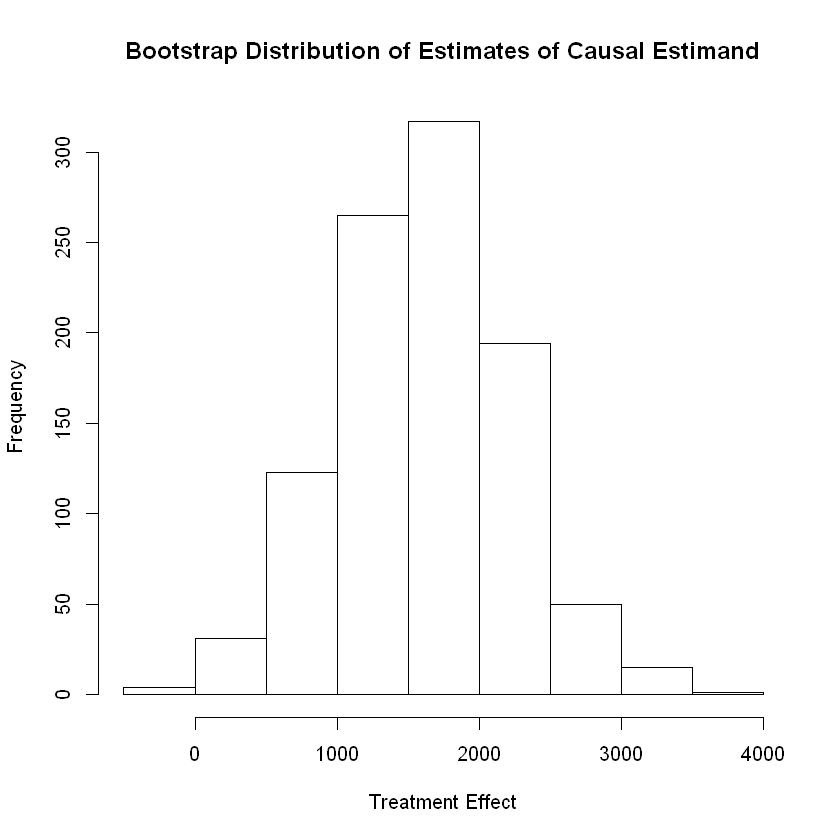

In [2]:
#install.packages("randomForest")
library(randomForest)

set.seed(1)

number_of_bootstrap_draws = 10^3

treatment_effect_estimates = rep(NA, number_of_bootstrap_draws)

Lalonde_data_treated = Lalonde_data[Lalonde_data$TREAT==1,]
Lalonde_data_control = Lalonde_data[Lalonde_data$TREAT==0,]

Lalonde_randomForest_treated = randomForest(x=Lalonde_data_treated[,1:10], 
                                            y=Lalonde_data_treated[,12])

Lalonde_randomForest_control = randomForest(x=Lalonde_data_control[,1:10], 
                                            y=Lalonde_data_control[,12])  
  
treatment_effect_estimate = mean(c((Lalonde_data_treated[,12] - 
                                    predict(Lalonde_randomForest_control, Lalonde_data_treated[,1:10])),
                                   (predict(Lalonde_randomForest_treated, Lalonde_data_control[,1:10]) - 
                                    Lalonde_data_control[,12])))

print(paste("The treatment effect estimate obtained from random forests is:", treatment_effect_estimate))

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  Lalonde_data_new_treated = Lalonde_data_treated[sample((1:nrow(Lalonde_data_treated)), replace=TRUE),]
  Lalonde_randomForest_new_treated = randomForest(x=Lalonde_data_new_treated[,1:10], 
                                                  y=Lalonde_data_new_treated[,12])
  Lalonde_data_new_control = Lalonde_data_control[sample((1:nrow(Lalonde_data_control)), replace=TRUE),]
  Lalonde_randomForest_new_control = randomForest(x=Lalonde_data_new_control[,1:10], 
                                                  y=Lalonde_data_new_control[,12])  
  
  treatment_effect_estimates[i] = mean(c((Lalonde_data_new_treated[,12] - 
                                          predict(Lalonde_randomForest_new_control, Lalonde_data_new_treated[,1:10])),
                                         (predict(Lalonde_randomForest_new_treated, Lalonde_data_new_control[,1:10]) - 
                                          Lalonde_data_new_control[,12])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)

hist(treatment_effect_estimates, main="Bootstrap Distribution of Estimates of Causal Estimand", xlab="Treatment Effect")

mean(treatment_effect_estimates)
sd(treatment_effect_estimates)
quantile(treatment_effect_estimates, prob=c(0.025,0.25,0.5,0.75,0.975))

&#9757; The estimates of the unit-level causal effects are based on the observed and imputed potential outcomes.

#### Comparing the Results from the Random Forest Algorithm to those from the Standard Linear Model

In [3]:
Lalonde_linear_model = lm(RE78 ~ MARR + NODEGREE + BLACK + HISPANIC + EDUC + AGE + RE74 + RE75 + U74 + U75 + TREAT,
                          data=Lalonde_data)

summary(Lalonde_linear_model)

#1.671e+03 + c(-1,1)*qt(0.975, df=433)*6.411e+02


Call:
lm(formula = RE78 ~ MARR + NODEGREE + BLACK + HISPANIC + EDUC + 
    AGE + RE74 + RE75 + U74 + U75 + TREAT, data = Lalonde_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -9612  -4355  -1572   3054  53119 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.567e+02  3.522e+03   0.073  0.94193   
MARR        -1.463e+02  8.823e+02  -0.166  0.86835   
NODEGREE    -1.518e+01  1.006e+03  -0.015  0.98796   
BLACK       -2.037e+03  1.174e+03  -1.736  0.08331 . 
HISPANIC     4.258e+02  1.565e+03   0.272  0.78562   
EDUC         4.008e+02  2.288e+02   1.751  0.08058 . 
AGE          5.357e+01  4.581e+01   1.170  0.24284   
RE74         1.234e-01  8.784e-02   1.405  0.16080   
RE75         1.974e-02  1.503e-01   0.131  0.89554   
U74          1.380e+03  1.188e+03   1.162  0.24590   
U75         -1.071e+03  1.025e+03  -1.045  0.29651   
TREAT        1.671e+03  6.411e+02   2.606  0.00948 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' 

## Part 3: Designing Observational Studies for Valid Causal Inference

### The Need to Design Observational Studies to Reduce Bias in Their Causal Inferences

An observational study involves an *assignment mechanism* whose functional form is unknown.

The analyses of observational studies are typically complicated by systematic differences in covariates across the different treatments.

Such differences can confound inferences and introduce bias.

Cochran (<a href="https://obsstudies.org/wp-content/uploads/2017/06/cochran_and_comments.pdf">1965</a>, <a href="https://doi.org/10.2307/2528036">1968</a>), Rubin (<a href="https://doi.org/10.2307/2529684">1973</a>):  Observational studies can be *designed* so as to reduce biases due to confounding, and yield valid causal inferences.

&#9757; Randomized experiments typically have the desirable feature that if sufficient care is taken in their design/randomization, then different statistical techniques will yield the correct answer, potentially with different levels of precision.

### Example: Covariate Balance in the Job Training Program

Loading required package: sm

Package 'sm', version 2.2-5.6: type help(sm) for summary information

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




[1] "Marriage : 0.189189189189189 , 0.153846153846154 , 0.393600016056372"
[1] "No High School Degree : 0.708108108108108 , 0.834615384615385 , 0.00214685437568014"
[1] "African-American : 0.843243243243243 , 0.826923076923077 , 0.744021068468005"
[1] "Hispanic : 0.0594594594594595 , 0.107692307692308 , 0.108868987268592"
[1] "Unemployed in 1974 : 0.708108108108108 , 0.75 , 0.381380629582063"
[1] "Unemployed in 1975 : 0.6 , 0.684615384615385 , 0.0813493975970139"
[1] "Education : 10.3459459459459 , 10.0884615384615 , 0.135411167169439"


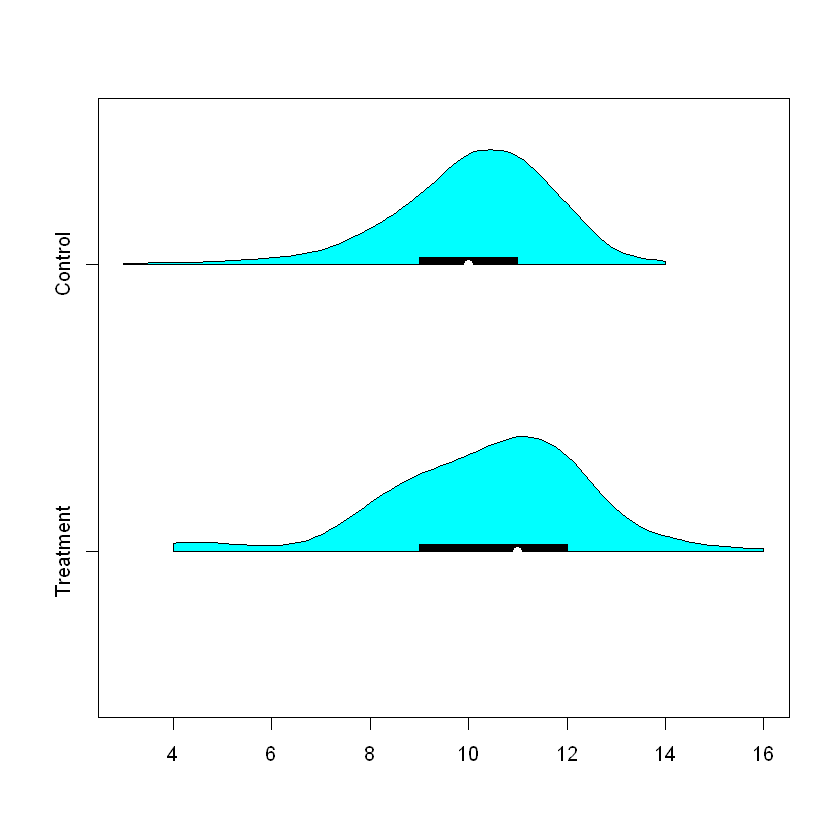

[1] "Age : 25.8162162162162 , 25.0538461538462 , 0.264764268805686"


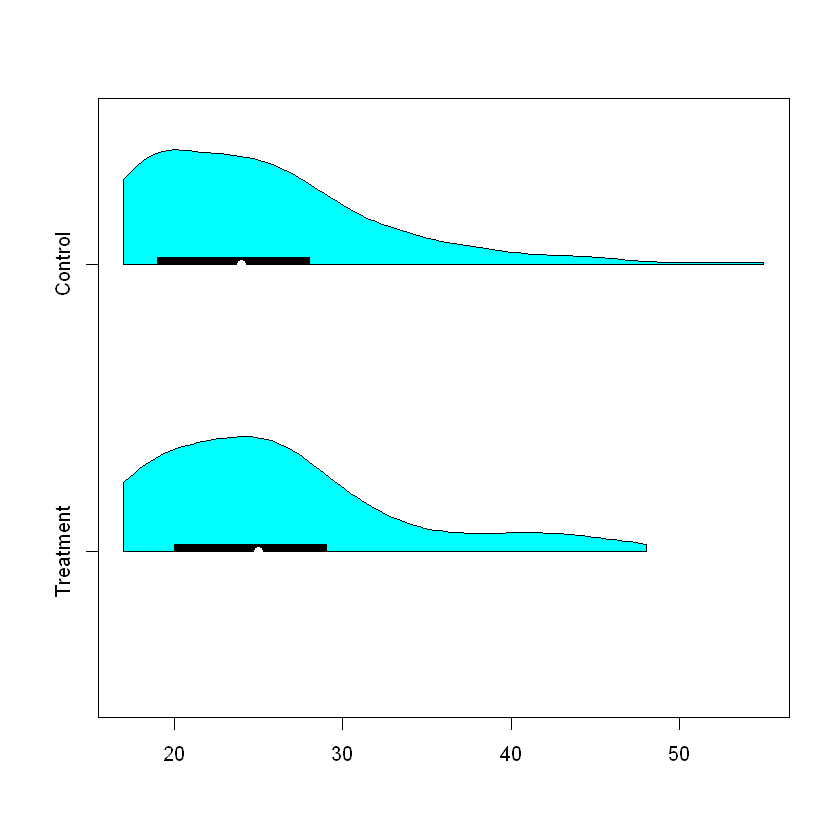

[1] "1974 Income : 2095.57405405405 , 2107.02538461538 , 0.982320764091842"


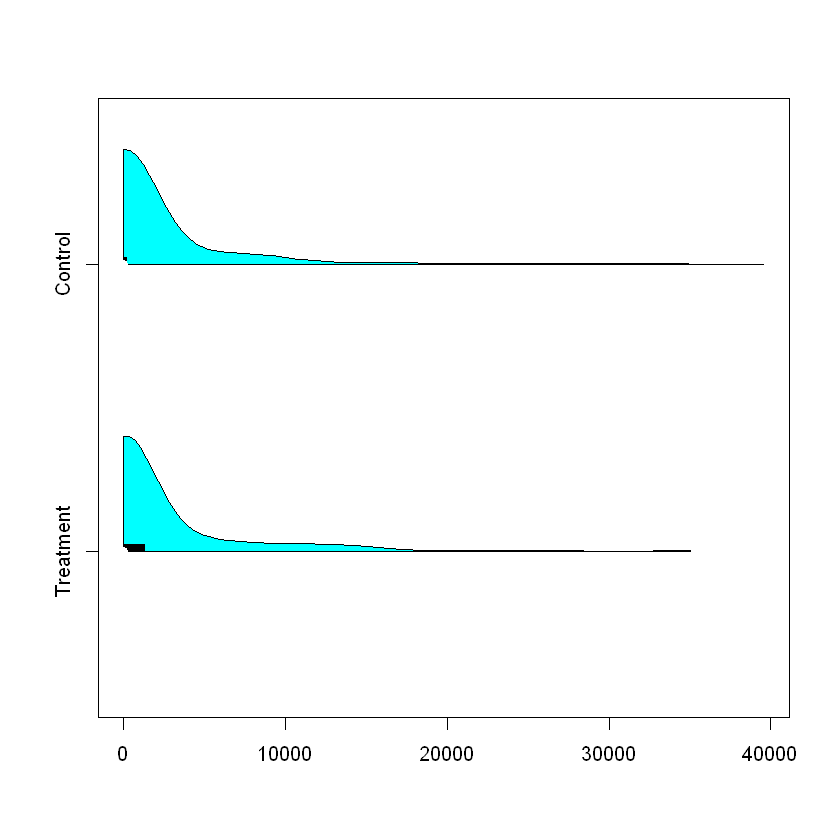

[1] "1975 Income : 1532.05675675676 , 1266.91 , 0.382253154580966"


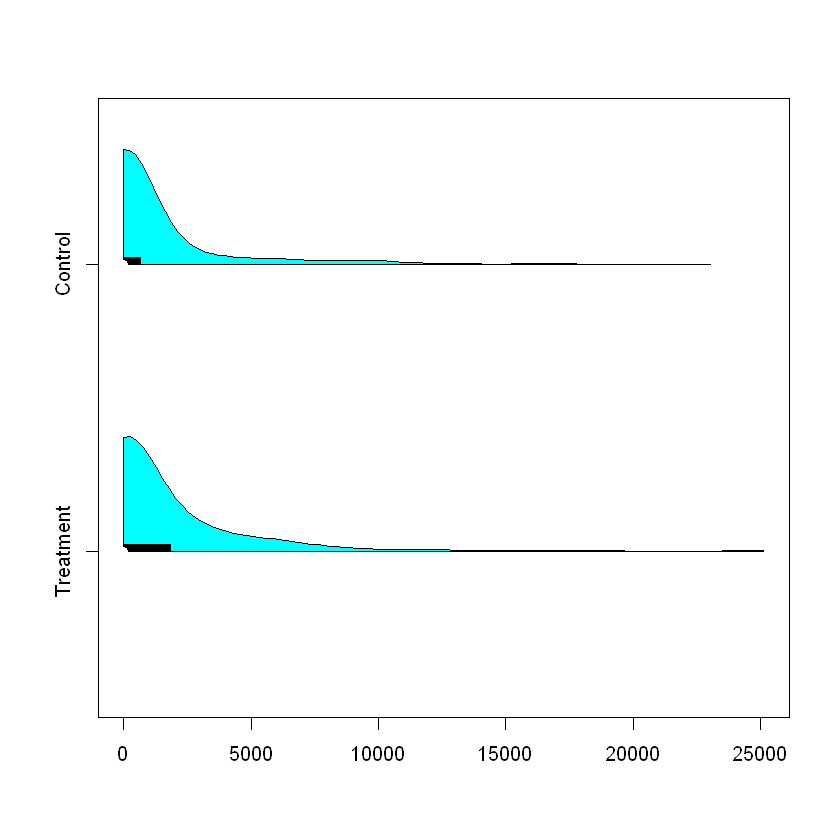

In [4]:
#install.packages("vioplot")
library(vioplot)

options(warn=-1)

experiment_data = Lalonde_data

numerical_covariate_balance = function(treated, control, covariate_name)
{
  mean_t = mean(treated)
  mean_c = mean(control)
  
  var_t = var(treated)
  var_c = var(control)
  pooled_var = (var_t*(length(treated)-1) + var_c*(length(control)-1))/(length(treated)+length(control)-2)
  standard_err = (pooled_var*(1/length(treated) + 1/length(control)))^0.5
  
  degrees_of_freedom = length(treated) + length(control) - 2
  
  test_statistic = (mean_t - mean_c)/(standard_err)
  
  p_value = 2*min(pt(test_statistic, df=degrees_of_freedom, lower.tail=TRUE), 
                  pt(test_statistic, df=degrees_of_freedom, lower.tail=FALSE))

  vioplot(treated, control, names=c("Treatment", "Control"), col="cyan", horizontal=TRUE, side="right")

  print(paste(covariate_name,":", mean_t, ",", mean_c, ",", p_value))
}

categorical_covariate_balance = function(treated, control, covariate_name)
{
    p_value = prop.test(x=c(sum(treated),sum(control)), 
                        n=c(length(treated), length(control)), 
                        alternative="two.sided", correct=TRUE)$p.value
    
    print(paste(covariate_name,":", mean(treated), ",", mean(control), ",", p_value))
}


categorical_covariate_balance(experiment_data$MARR[experiment_data$TREAT==1], 
                              experiment_data$MARR[experiment_data$TREAT==0],
                             "Marriage")
categorical_covariate_balance(experiment_data$NODEGREE[experiment_data$TREAT==1],
                              experiment_data$NODEGREE[experiment_data$TREAT==0],
                             "No High School Degree")
categorical_covariate_balance(experiment_data$BLACK[experiment_data$TREAT==1], 
                              experiment_data$BLACK[experiment_data$TREAT==0],
                             "African-American")
categorical_covariate_balance(experiment_data$HISPANIC[experiment_data$TREAT==1],
                              experiment_data$HISPANIC[experiment_data$TREAT==0],
                             "Hispanic")
categorical_covariate_balance(experiment_data$U74[experiment_data$TREAT==1], 
                              experiment_data$U74[experiment_data$TREAT==0],
                             "Unemployed in 1974")
categorical_covariate_balance(experiment_data$U75[experiment_data$TREAT==1],
                              experiment_data$U75[experiment_data$TREAT==0],
                             "Unemployed in 1975")

numerical_covariate_balance(experiment_data$EDUC[experiment_data$TREAT==1], 
                            experiment_data$EDUC[experiment_data$TREAT==0], 
                            "Education")
numerical_covariate_balance(experiment_data$AGE[experiment_data$TREAT==1],
                            experiment_data$AGE[experiment_data$TREAT==0],
                           "Age")
numerical_covariate_balance(experiment_data$RE74[experiment_data$TREAT==1], 
                            experiment_data$RE74[experiment_data$TREAT==0],
                           "1974 Income")
numerical_covariate_balance(experiment_data$RE75[experiment_data$TREAT==1],
                            experiment_data$RE75[experiment_data$TREAT==0],
                           "1975 Income")

<table width="565">
    <thead>
        <tr>
            <th> Covariate </th>
            <th> $\bar{X}_1$ </th>
            <th> $\bar{X}_0$ </th>
            <th> $p$-value </th>
        </tr>
    </thead>
    <tr>
        <td> Marriage </td>
        <td> $0.19$ </td>
        <td> $0.15$ </td>
        <td> $0.327$ </td>
    </tr>
    <tr>
        <td> No Degree </td>
        <td> $0.71$ </td>
        <td> $0.83$ </td>
        <td> $0.0014$ </td>
    </tr>
    <tr>
        <td> Black </td>
        <td> $0.84$ </td>
        <td> $0.83$ </td>
        <td> $0.649$ </td>
    </tr>
    <tr>
        <td> Hispanic </td>
        <td> $0.06$ </td>
        <td> $0.11$ </td>
        <td> $0.076$ </td>
    </tr>    
    <tr>
        <td> Years Education </td>
        <td> $10.35$ </td>
        <td> $10.09$ </td>
        <td> $0.14$ </td>
    </tr> 
    <tr>
        <td> Age </td>
        <td> $25.82$ </td>
        <td> $25.05$ </td>
        <td> $0.265$ </td>
    </tr>    
    <tr>
        <td> $1974$ Earnings </td>
        <td> $2095.57$ </td>
        <td> $2107.03$ </td>
        <td> $0.98$ </td>
    </tr>    
    <tr>
        <td> $1975$ Earnings </td>
        <td> $1532.07$ </td>
        <td> $1266.91$ </td>
        <td> $0.382$ </td>
    </tr>
    <tr>
        <td> Unemployed $1974$ </td>
        <td> $0.71$ </td>
        <td> $0.75$ </td>
        <td> $0.326$ </td>
    </tr>
    <tr>
        <td> Unemployed $1975$ </td>
        <td> $0.60$ </td>
        <td> $0.68$ </td>
        <td> $0.065$ </td>
    </tr>        
</table>

### Studies of LaLonde (<a href="https://www.jstor.org/stable/1806062">1986</a>) and Dehejia & Wahba (<a href="https://www.tandfonline.com/doi/abs/10.1080/01621459.1999.10473858">1999</a>)

LaLonde (<a href="https://www.jstor.org/stable/1806062">1986</a>), and later Dehejia & Wahba (<a href="https://www.tandfonline.com/doi/abs/10.1080/01621459.1999.10473858">1999</a>), considered what would happen if traditional statistical methodologies were used to study data from an *observational study*, not an experiment. 

As we already know the "correct" answer for this job training program experiment, they constructed an observational study using just the treated units in this experiment, and investigated whether they would get the same "correct" answer from the observational study.

Specifically, suppose we had data on only the 185 treated units from the job training program, and did not know a great deal about how these units came to be treated. 

To learn about the effect of the job training program on annual earnings, we form a control group by collecting data on 2490 units drawn from the Panel Study of Income Dynamics.

We collect the same covariates and response for all units.

&#129300; Do we get the correct causal inferences for the effect of the job training program on annual earnings from this observational study?

### Naive Machine Learning for the Observational Study

[1] "The treatment effect estimate obtained from random forests is: -9614.72259267092"
  |======================================================================| 100%


[1] -10000.36

[1] 2770.611

2.5%        25%        50%        75%      97.5% 
-15106.218 -12313.425  -9726.729  -7770.886  -5301.190

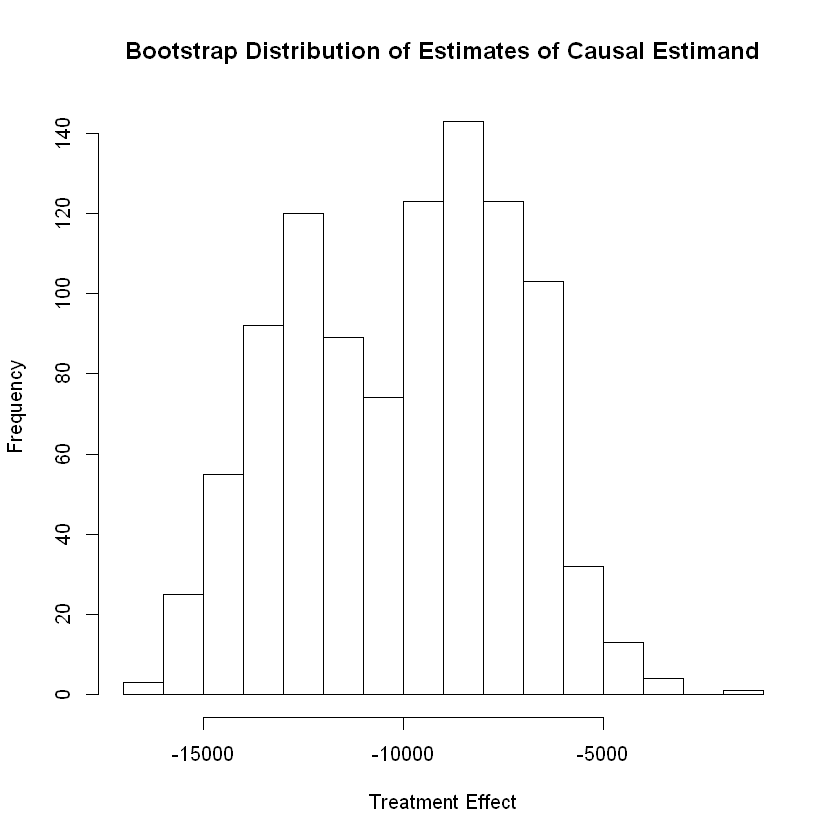

In [5]:
observational_data = read.table("Lalonde_observational_data.txt", header=T, sep="")

observational_data_treated = observational_data[observational_data$TREAT==1,]
observational_data_control = observational_data[observational_data$TREAT==0,]

observational_randomForest_treated = randomForest(x=observational_data_treated[,3:12], 
                                                  y=observational_data_treated[,1])

observational_randomForest_control = randomForest(x=observational_data_control[,3:12], 
                                                  y=observational_data_control[,1])  
  
treatment_effect_estimate = mean(c((observational_data_treated[,1] - 
                                    predict(observational_randomForest_control, observational_data_treated[,3:12])),
                                   (predict(observational_randomForest_treated, observational_data_control[,3:12]) - 
                                    observational_data_control[,1])))

print(paste("The treatment effect estimate obtained from random forests is:", treatment_effect_estimate))

number_of_bootstrap_draws = 10^3

treatment_effect_estimates = rep(NA, number_of_bootstrap_draws)

observational_data_treated = observational_data[observational_data$TREAT==1,]
observational_data_control = observational_data[observational_data$TREAT==0,]

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  observational_data_new_treated = observational_data_treated[sample((1:nrow(observational_data_treated)), replace=TRUE),]
  observational_randomForest_new_treated = randomForest(x=observational_data_new_treated[,3:12], 
                                                        y=observational_data_new_treated[,1])
  observational_data_new_control = observational_data_control[sample((1:nrow(observational_data_control)), replace=TRUE),]
  observational_randomForest_new_control = randomForest(x=observational_data_new_control[,3:12], 
                                                        y=observational_data_new_control[,1])  
  
  treatment_effect_estimates[i] = mean(c((observational_data_new_treated[,1] - 
                                          predict(observational_randomForest_new_control,
                                                  observational_data_new_treated[,3:12])),
                                         (predict(observational_randomForest_new_treated, 
                                                  observational_data_new_control[,3:12]) - 
                                          observational_data_new_control[,1])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)

hist(treatment_effect_estimates, main="Bootstrap Distribution of Estimates of Causal Estimand", xlab="Treatment Effect")

mean(treatment_effect_estimates)
sd(treatment_effect_estimates)
quantile(treatment_effect_estimates, prob=c(0.025,0.25,0.5,0.75,0.975))

Machine learning did not correct the bias introduced by imbalances in the covariates (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 277)!

### Covariate Balance in the Observational Study

[1] "Marriage : 0.189189189189189 , 0.866265060240964 , 4.68007728305411e-117"
[1] "No High School Degree : 0.708108108108108 , 0.305220883534137 , 8.32164017836424e-29"
[1] "African-American : 0.843243243243243 , 0.250602409638554 , 5.12399430234964e-65"
[1] "Hispanic : 0.0594594594594595 , 0.0325301204819277 , 0.0836134327225996"
[1] "Unemployed in 1974 : 0.708108108108108 , 0.0863453815261044 , 2.22130836324017e-129"
[1] "Unemployed in 1975 : 0.6 , 0.1 , 1.91495775994449e-81"
[1] "Education : 10.3459459459459 , 12.1168674698795 , 2.00780829375752e-14"


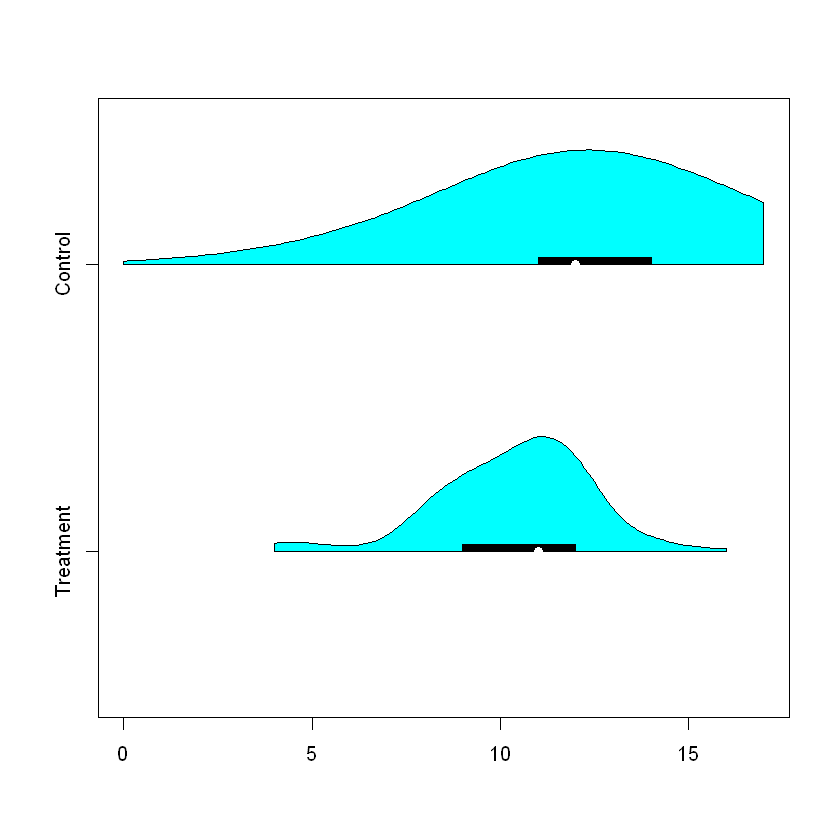

[1] "Age : 25.8162162162162 , 34.8506024096386 , 3.09494054870162e-30"


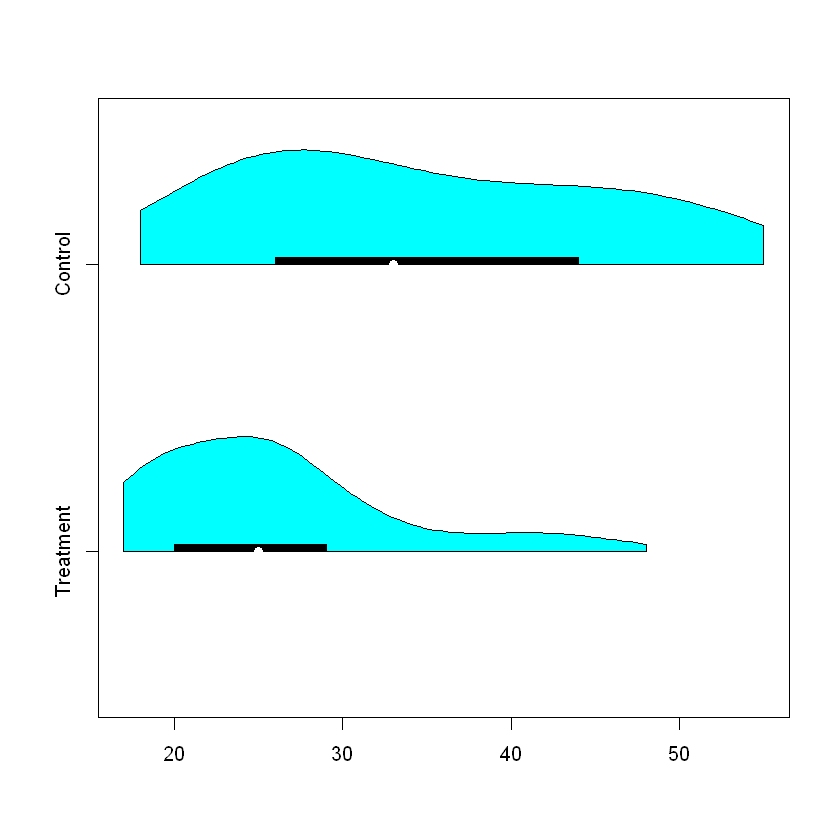

[1] "1974 Income : 2095.57405405405 , 19428.7458428916 , 5.60415114162859e-65"


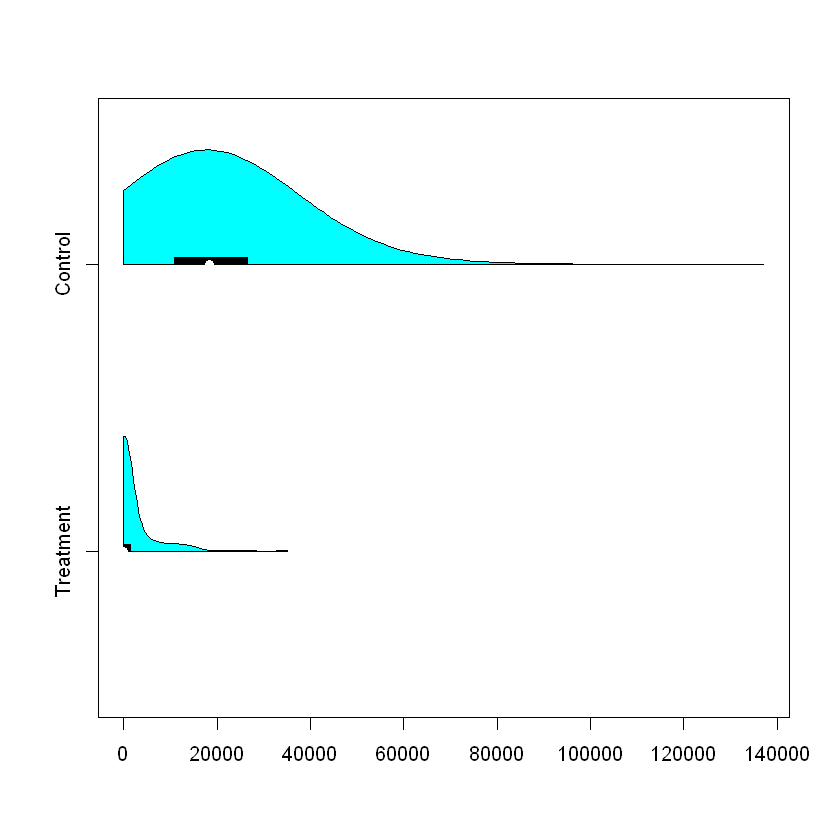

[1] "1975 Income : 1532.05675675676 , 19063.3375870281 , 5.44370824933261e-65"


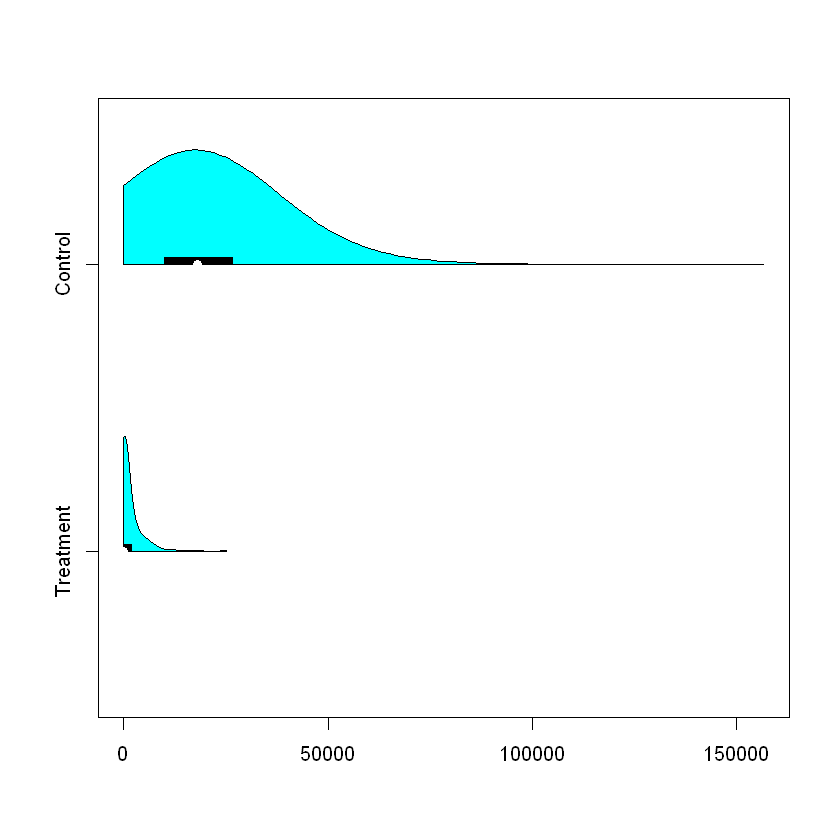

In [6]:
categorical_covariate_balance(observational_data$MARR[observational_data$TREAT==1], 
                              observational_data$MARR[observational_data$TREAT==0],
                             "Marriage")
categorical_covariate_balance(observational_data$NODEGREE[observational_data$TREAT==1],
                              observational_data$NODEGREE[observational_data$TREAT==0],
                             "No High School Degree")
categorical_covariate_balance(observational_data$BLACK[observational_data$TREAT==1], 
                              observational_data$BLACK[observational_data$TREAT==0],
                             "African-American")
categorical_covariate_balance(observational_data$HISPANIC[observational_data$TREAT==1],
                              observational_data$HISPANIC[observational_data$TREAT==0],
                             "Hispanic")
categorical_covariate_balance(observational_data$U74[observational_data$TREAT==1], 
                              observational_data$U74[observational_data$TREAT==0],
                             "Unemployed in 1974")
categorical_covariate_balance(observational_data$U75[observational_data$TREAT==1],
                              observational_data$U75[observational_data$TREAT==0],
                             "Unemployed in 1975")

numerical_covariate_balance(observational_data$EDUC[observational_data$TREAT==1], 
                            observational_data$EDUC[observational_data$TREAT==0], 
                            "Education")
numerical_covariate_balance(observational_data$AGE[observational_data$TREAT==1],
                            observational_data$AGE[observational_data$TREAT==0],
                           "Age")
numerical_covariate_balance(observational_data$RE74[observational_data$TREAT==1], 
                            observational_data$RE74[observational_data$TREAT==0],
                           "1974 Income")
numerical_covariate_balance(observational_data$RE75[observational_data$TREAT==1],
                            observational_data$RE75[observational_data$TREAT==0],
                           "1975 Income")

<table width="565">
    <thead>
        <tr>
            <th> Covariate </th>
            <th> $\bar{X}_1$ </th>
            <th> $\bar{X}_0$ </th>
            <th> $p$-value </th>
        </tr>
    </thead>
    <tr>
        <td> Marriage </td>
        <td> $0.19$ </td>
        <td> $0.87$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> No Degree </td>
        <td> $0.71$ </td>
        <td> $0.31$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Black </td>
        <td> $0.84$ </td>
        <td> $0.25$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Hispanic </td>
        <td> $0.06$ </td>
        <td> $0.03$ </td>
        <td> $0.05$ </td>
    </tr>    
    <tr>
        <td> Years Education </td>
        <td> $10.35$ </td>
        <td> $12.1$ </td>
        <td> $\approx 0$ </td>
    </tr> 
    <tr>
        <td> Age </td>
        <td> $25.82$ </td>
        <td> $34.85$ </td>
        <td> $\approx 0$ </td>
    </tr>    
    <tr>
        <td> $1974$ Earnings </td>
        <td> $2095.57$ </td>
        <td> $19429$ </td>
        <td> $\approx 0$ </td>
    </tr>    
    <tr>
        <td> $1975$ Earnings </td>
        <td> $1532.07$ </td>
        <td> $19063$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Unemployed $1974$ </td>
        <td> $0.71$ </td>
        <td> $0.09$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Unemployed $1975$ </td>
        <td> $0.60$ </td>
        <td> $0.1$ </td>
        <td> $\approx 0$ </td>
    </tr>        
</table>

### Complication in the Observational Study: Covariate Imbalance

In general, treated and control units in an observational study will differ (sometimes immensely) in terms of their covariates.

Bias in estimation of the treatment effect will then be introduced by imbalances in covariates.

Lalonde (<a href="https://www.jstor.org/stable/1806062">1986</a>): Traditional observational studies are fundamentally flawed.

Intuitively, we need to discard control units who are not comparable to treated units, so as to compare "like with like" and remove such biases.

&#129300; How do we determine the units to discard in the presence of many covariates?

### The Propensity Score and Subclassification/Matching

Just as in designed experiments, the propensity score plays a big role in the design, and ultimately analysis, of an observational study.

The propensity score for a unit $i$ is defined as (excluding technicalities at this point)
$$
e(X_i) = \mathrm{Pr}(W_i = 1 \mid X_i).
$$

&#128161; An estimated propensity score serves as a one-dimensional summary of all covariates.

If propensity scores are constant across treatment and control groups, then the covariates are identically distributed across the groups (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 266, 277).

Discarding units with extreme propensity scores, and further subclassifying/matching the remaining units with respect to their propensity scores, can reduce the bias in estimating causal effects from observational studies (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: Parts III, IV).

# An Important Note for the Design of Observational Studies

# Do not look at observed outcomes during the design of an observational study (Imbens & Rubin, 2015: p. 276).

### Initial Design of the Observational Study

Consider estimation of propensity scores based on a logistic regression with main effects for all covariates. 

Control units with estimated propensity scores lower than the minimum of the treated units' estimated propensity scores, or larger than the maximum of the treated units' estimated propensity scores, are discarded. 

These units are irrelevant in any analyses we wish to perform.

We want to infer the treatment effect on units who resemble those in the treatment group, and we do not intend to extrapolate. 

After discarding these units, 1208 control units remain.

### Covariate Balance Among Remaining Units

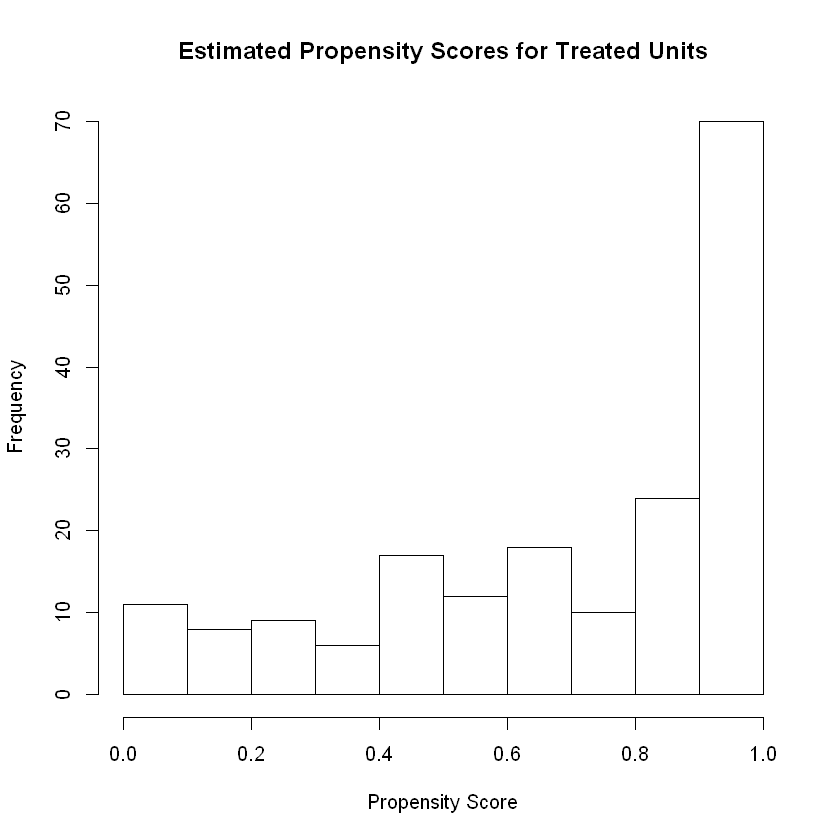

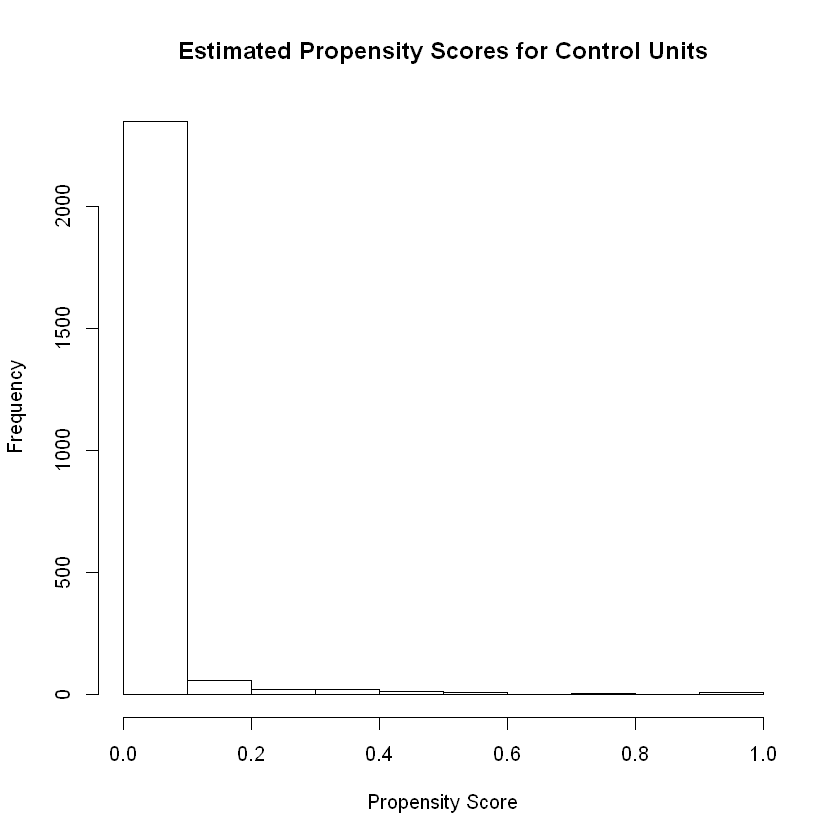

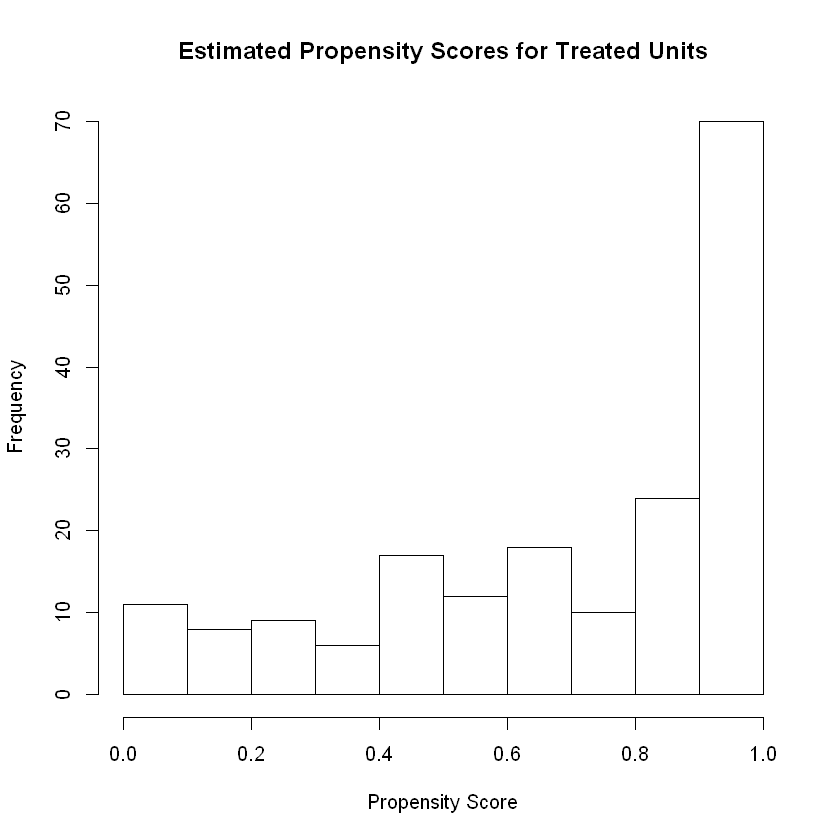

[1] "Marriage : 0.189189189189189 , 0.780629139072848 , 1.09554668599274e-59"
[1] "No High School Degree : 0.708108108108108 , 0.410596026490066 , 6.62441037350883e-14"
[1] "African-American : 0.843243243243243 , 0.43294701986755 , 5.84073058508118e-25"
[1] "Hispanic : 0.0594594594594595 , 0.048841059602649 , 0.66360489445241"
[1] "Unemployed in 1974 : 0.708108108108108 , 0.165562913907285 , 5.45838970175597e-58"
[1] "Unemployed in 1975 : 0.6 , 0.204470198675497 , 5.61158183055686e-30"


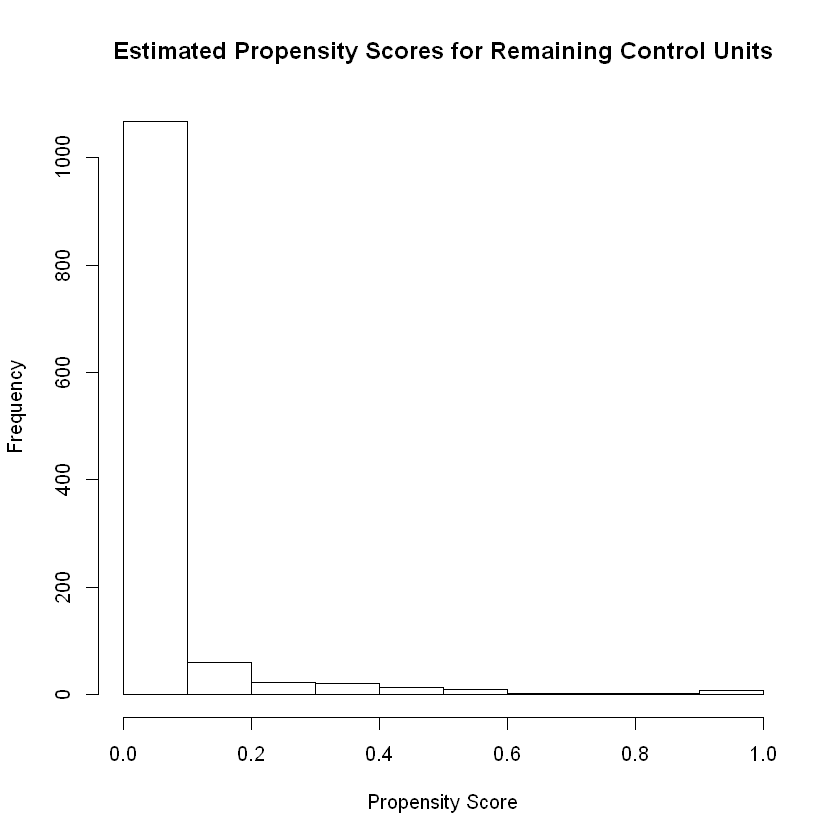

[1] "Education : 10.3459459459459 , 11.2557947019868 , 7.14192277404495e-05"


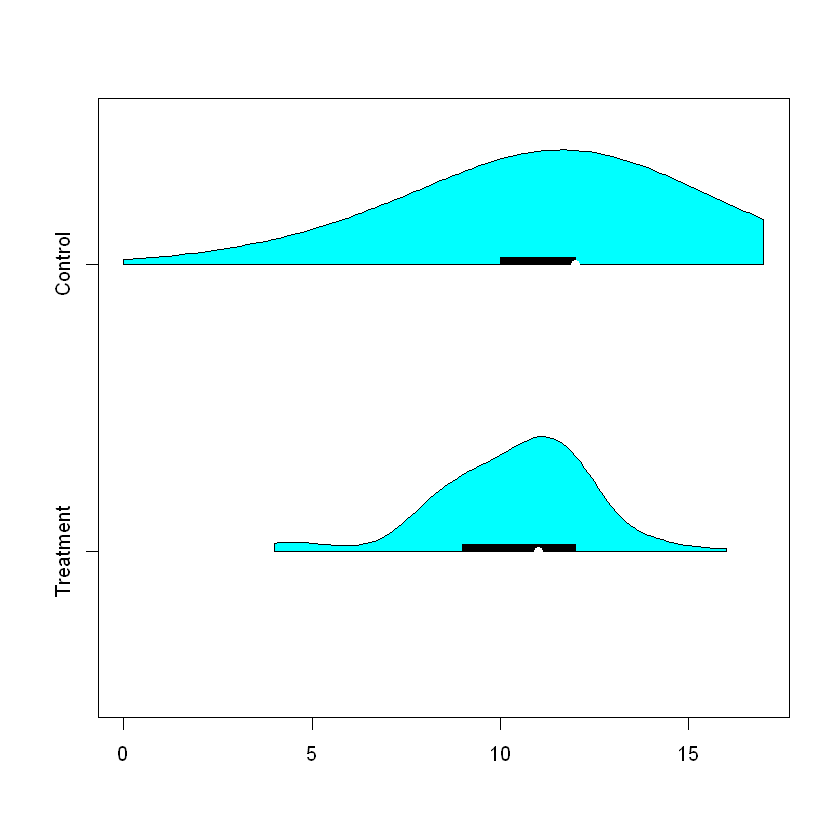

[1] "Age : 25.8162162162162 , 31.8998344370861 , 2.60148220574681e-14"


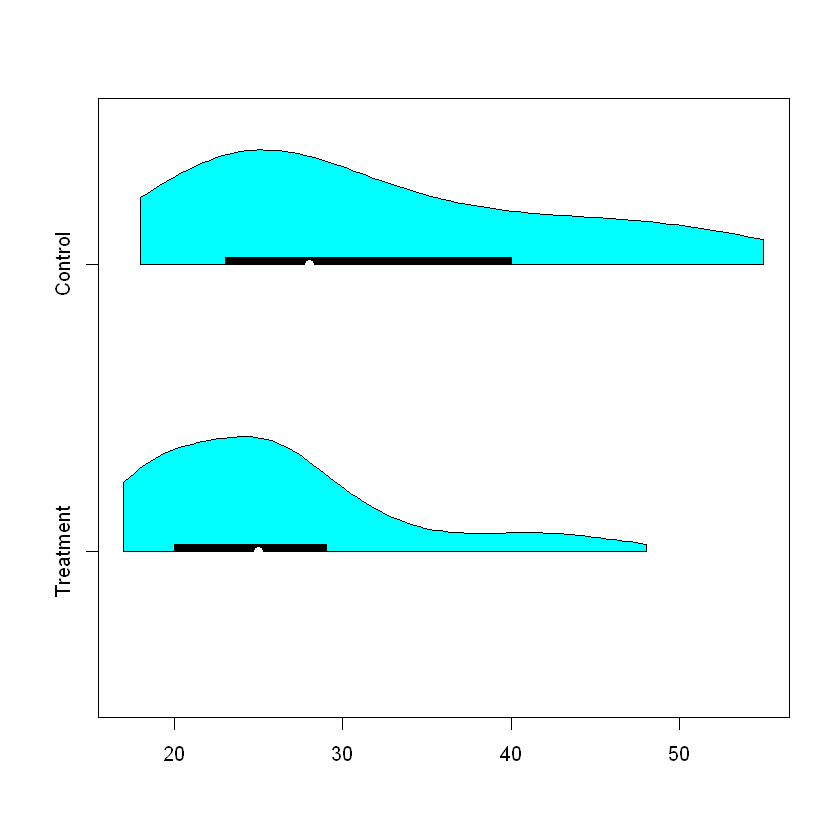

[1] "1974 Income : 2095.57405405405 , 11051.4292944536 , 2.05524196773978e-44"


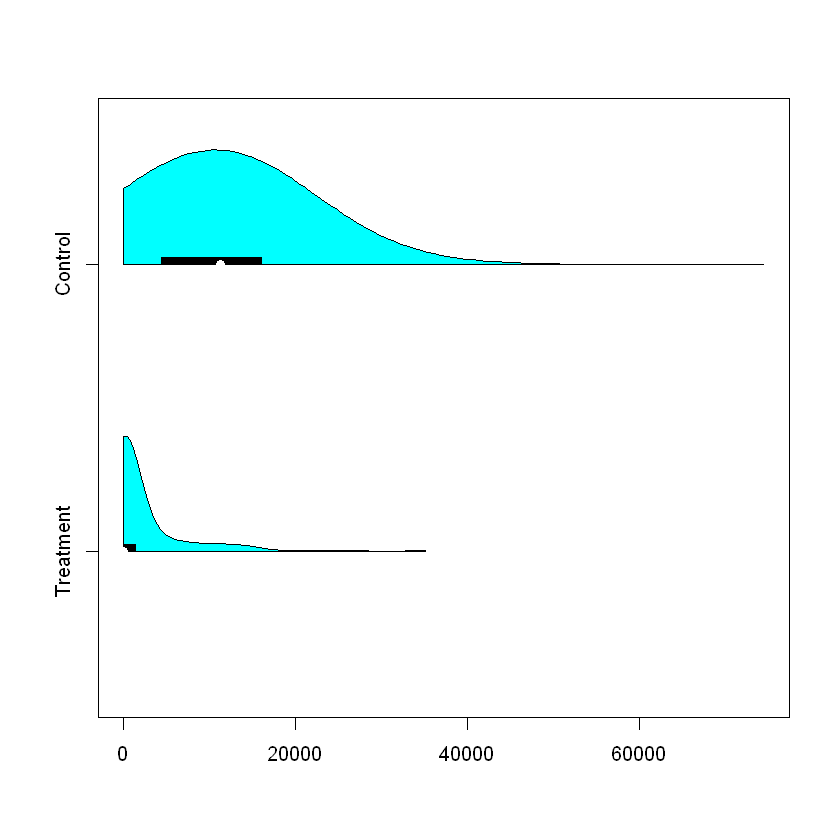

[1] "1975 Income : 1532.05675675676 , 9359.71751937086 , 6.39731949833502e-48"


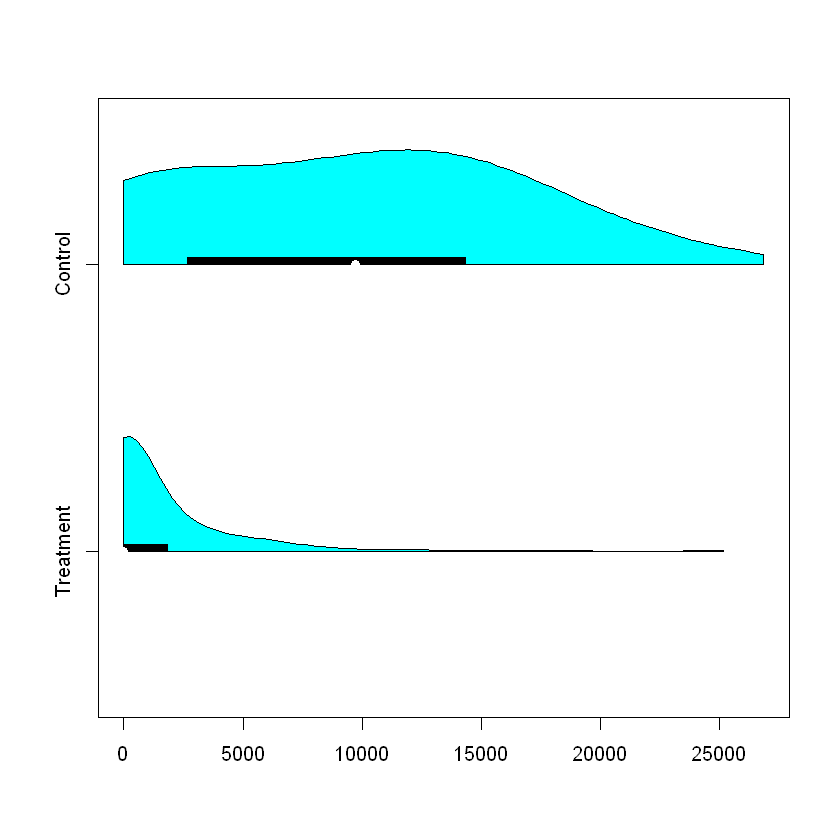

In [7]:
propensity_score_model = glm(TREAT ~ MARR + NODEGREE + BLACK + HISPANIC + EDUC + AGE + RE74 + RE75 + U74 + U75, 
                             data=observational_data, family=binomial)

propensity_scores = propensity_score_model$fitted.values

hist(propensity_scores[1:185], main="Estimated Propensity Scores for Treated Units", xlab="Propensity Score")
hist(propensity_scores[186:2675], main="Estimated Propensity Scores for Control Units", xlab="Propensity Score")

min_treat_prop = min(propensity_scores[1:185])
max_treat_prop = max(propensity_scores[1:185])

data = cbind(observational_data, propensity_scores)
treated_units = data[1:185,]
new_control_units = data[data$TREAT==0 & data$propensity_scores>=min_treat_prop & data$propensity_scores<=max_treat_prop,]
new_data = rbind(treated_units, new_control_units)

hist(propensity_scores[1:185], main="Estimated Propensity Scores for Treated Units", xlab="Propensity Score")
hist(new_control_units[,14], main="Estimated Propensity Scores for Remaining Control Units", xlab="Propensity Score")

categorical_covariate_balance(new_data$MARR[new_data$TREAT==1], 
                              new_data$MARR[new_data$TREAT==0],
                             "Marriage")
categorical_covariate_balance(new_data$NODEGREE[new_data$TREAT==1],
                              new_data$NODEGREE[new_data$TREAT==0],
                             "No High School Degree")
categorical_covariate_balance(new_data$BLACK[new_data$TREAT==1], 
                              new_data$BLACK[new_data$TREAT==0],
                             "African-American")
categorical_covariate_balance(new_data$HISPANIC[new_data$TREAT==1],
                              new_data$HISPANIC[new_data$TREAT==0],
                             "Hispanic")
categorical_covariate_balance(new_data$U74[new_data$TREAT==1], 
                              new_data$U74[new_data$TREAT==0],
                             "Unemployed in 1974")
categorical_covariate_balance(new_data$U75[new_data$TREAT==1],
                              new_data$U75[new_data$TREAT==0],
                             "Unemployed in 1975")

numerical_covariate_balance(new_data$EDUC[new_data$TREAT==1], 
                            new_data$EDUC[new_data$TREAT==0], 
                            "Education")
numerical_covariate_balance(new_data$AGE[new_data$TREAT==1],
                            new_data$AGE[new_data$TREAT==0],
                           "Age")
numerical_covariate_balance(new_data$RE74[new_data$TREAT==1], 
                            new_data$RE74[new_data$TREAT==0],
                           "1974 Income")
numerical_covariate_balance(new_data$RE75[new_data$TREAT==1],
                            new_data$RE75[new_data$TREAT==0],
                           "1975 Income")

<table width="565">
    <thead>
        <tr>
            <th> Covariate </th>
            <th> $\bar{X}_1$ </th>
            <th> $\bar{X}_0$ </th>
            <th> $p$-value </th>
        </tr>
    </thead>
    <tr>
        <td> Marriage </td>
        <td> $0.19$ </td>
        <td> $0.78$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> No Degree </td>
        <td> $0.71$ </td>
        <td> $0.41$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Black </td>
        <td> $0.84$ </td>
        <td> $0.43$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Hispanic </td>
        <td> $0.06$ </td>
        <td> $0.05$ </td>
        <td> $0.66$ </td>
    </tr>    
    <tr>
        <td> Years Education </td>
        <td> $10.35$ </td>
        <td> $11.3$ </td>
        <td> $\approx 0$ </td>
    </tr> 
    <tr>
        <td> Age </td>
        <td> $25.82$ </td>
        <td> $31.9$ </td>
        <td> $\approx 0$ </td>
    </tr>    
    <tr>
        <td> $1974$ Earnings </td>
        <td> $2095.57$ </td>
        <td> $11051$ </td>
        <td> $\approx 0$ </td>
    </tr>    
    <tr>
        <td> $1975$ Earnings </td>
        <td> $1532.07$ </td>
        <td> $936$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Unemployed $1974$ </td>
        <td> $0.71$ </td>
        <td> $0.17$ </td>
        <td> $\approx 0$ </td>
    </tr>
    <tr>
        <td> Unemployed $1975$ </td>
        <td> $0.60$ </td>
        <td> $0.2$ </td>
        <td> $\approx 0$ </td>
    </tr>        
</table>

### Machine Learning for the Remaining Units

[1] "The treatment effect estimate obtained from random forests is: -3761.77835337285"
  |======================================================================| 100%


[1] -3992.876

[1] 1366.195

2.5%       25%       50%       75%     97.5% 
-6677.413 -4929.193 -3943.843 -3033.366 -1442.023

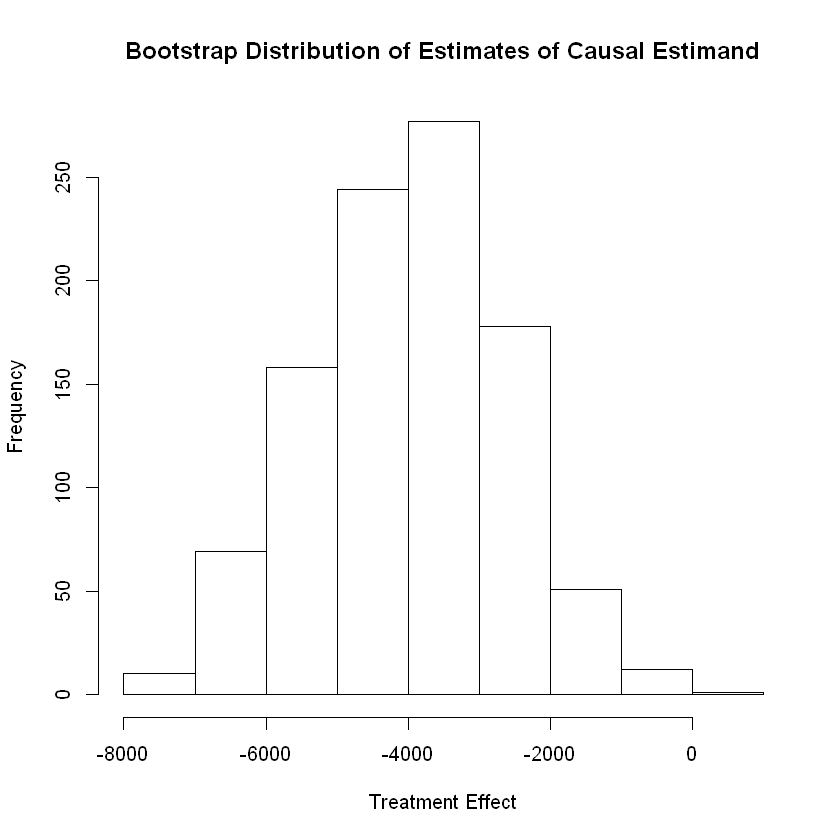

In [8]:
observational_data_treated = new_data[new_data$TREAT==1,]
observational_data_control = new_data[new_data$TREAT==0,]

observational_randomForest_treated = randomForest(x=observational_data_treated[,3:12], 
                                                  y=observational_data_treated[,1])

observational_randomForest_control = randomForest(x=observational_data_control[,3:12], 
                                                  y=observational_data_control[,1])  
  
treatment_effect_estimate = mean(c((observational_data_treated[,1] - 
                                    predict(observational_randomForest_control, observational_data_treated[,3:12])),
                                   (predict(observational_randomForest_treated, observational_data_control[,3:12]) - 
                                    observational_data_control[,1])))

print(paste("The treatment effect estimate obtained from random forests is:", treatment_effect_estimate))


number_of_bootstrap_draws = 10^3

treatment_effect_estimates = rep(NA, number_of_bootstrap_draws)

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  observational_data_new_treated = observational_data_treated[sample((1:nrow(observational_data_treated)), replace=TRUE),]
  observational_randomForest_new_treated = randomForest(x=observational_data_new_treated[,3:12], 
                                                        y=observational_data_new_treated[,1])
  observational_data_new_control = observational_data_control[sample((1:nrow(observational_data_control)), replace=TRUE),]
  observational_randomForest_new_control = randomForest(x=observational_data_new_control[,3:12], 
                                                        y=observational_data_new_control[,1])  
  
  treatment_effect_estimates[i] = mean(c((observational_data_new_treated[,1] - 
                                          predict(observational_randomForest_new_control,
                                                  observational_data_new_treated[,3:12])),
                                         (predict(observational_randomForest_new_treated, 
                                                  observational_data_new_control[,3:12]) - 
                                          observational_data_new_control[,1])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)


hist(treatment_effect_estimates, main="Bootstrap Distribution of Estimates of Causal Estimand", xlab="Treatment Effect")

mean(treatment_effect_estimates)
sd(treatment_effect_estimates)
quantile(treatment_effect_estimates, prob=c(0.025,0.25,0.5,0.75,0.975))

### Subclassification on the Estimated Propenstiy Scores

Estimation of treatment effects through propensity score subclassification consists of the following broad steps. 

- Form subclasses of units with similar propensity scores. 

- Check that balance has been achieved on covariates. 

- Estimate treatment effects individually for each subclass. 

- Calculate the weighted average of treatment effect estimates across subclasses to estimate the treatment effect.

For example, consider subclasses defined by the quantiles (0,0.6,0.8,0.9,0.95,1) of the estimated propensity scores.

The number of treated units in each subclass are: 6, 10, 43, 62, 64.

The number of control units in each subclass are: 830, 268, 06, 8, 6.

### Covariate Balance Across Subclasses

In [16]:
quantiles = quantile(new_data$propensity_scores, probs=c(0, 0.6, 0.8, 0.9, 0.95, 1))

subclass_1 = new_data[new_data$propensity_scores<=quantiles[2],]
subclass_2 = new_data[new_data$propensity_scores<=quantiles[3] & new_data$propensity_scores>quantiles[2],]
subclass_3 = new_data[new_data$propensity_scores<=quantiles[4] & new_data$propensity_scores>quantiles[3],]
subclass_4 = new_data[new_data$propensity_scores<=quantiles[5] & new_data$propensity_scores>quantiles[4],]
subclass_5 = new_data[new_data$propensity_scores>quantiles[5],]

number_treated_units = c(sum(subclass_1$TREAT==1), 
                         sum(subclass_2$TREAT==1), 
                         sum(subclass_3$TREAT==1),
                         sum(subclass_4$TREAT==1), 
                         sum(subclass_5$TREAT==1))
number_control_units = c(sum(subclass_1$TREAT==0), 
                         sum(subclass_2$TREAT==0), 
                         sum(subclass_3$TREAT==0), 
                         sum(subclass_4$TREAT==0), 
                         sum(subclass_5$TREAT==0))

number_treated_units
number_control_units

subclass = rep(NA, 1393)

for(i in 1:1393)
{
  if(new_data$propensity_scores[i]<=quantiles[2]) subclass[i] = 1
  if(new_data$propensity_scores[i]<=quantiles[3] & new_data$propensity_scores[i]>quantiles[2]) subclass[i] = 2 
  if(new_data$propensity_scores[i]<=quantiles[4] & new_data$propensity_scores[i]>quantiles[3]) subclass[i] = 3
  if(new_data$propensity_scores[i]<=quantiles[5] & new_data$propensity_scores[i]>quantiles[4]) subclass[i] = 4
  if(new_data$propensity_scores[i]>quantiles[5]) subclass[i] = 5
}

subclassified_data = cbind(new_data, subclass)

covariate_balance = function(subclass)
{
  subclass_t_MARR = mean(subclass$MARR[subclass$TREAT==1])
  subclass_c_MARR = mean(subclass$MARR[subclass$TREAT==0])
  
  subclass_t_NODEGREE = mean(subclass$NODEGREE[subclass$TREAT==1])
  subclass_c_NODEGREE = mean(subclass$NODEGREE[subclass$TREAT==0])
  
  subclass_t_BLACK = mean(subclass$BLACK[subclass$TREAT==1])
  subclass_c_BLACK = mean(subclass$BLACK[subclass$TREAT==0])
  
  subclass_t_HISPANIC = mean(subclass$HISPANIC[subclass$TREAT==1])
  subclass_c_HISPANIC = mean(subclass$HISPANIC[subclass$TREAT==0])
  
  subclass_t_EDUC = mean(subclass$EDUC[subclass$TREAT==1])
  subclass_c_EDUC = mean(subclass$EDUC[subclass$TREAT==0])
  
  subclass_t_AGE = mean(subclass$AGE[subclass$TREAT==1])
  subclass_c_AGE = mean(subclass$AGE[subclass$TREAT==0])
  
  subclass_t_RE74 = mean(subclass$RE74[subclass$TREAT==1])
  subclass_c_RE74 = mean(subclass$RE74[subclass$TREAT==0])
  
  subclass_t_RE75 = mean(subclass$RE75[subclass$TREAT==1])
  subclass_c_RE75 = mean(subclass$RE75[subclass$TREAT==0])
  
  subclass_t_U74 = mean(subclass$U74[subclass$TREAT==1])
  subclass_c_U74 = mean(subclass$U74[subclass$TREAT==0])
  
  subclass_t_U75 = mean(subclass$U75[subclass$TREAT==1])
  subclass_c_U75 = mean(subclass$U75[subclass$TREAT==0])
  
  subclass_t = c(subclass_t_MARR, subclass_t_NODEGREE, subclass_t_BLACK, 
                subclass_t_HISPANIC, subclass_t_EDUC, subclass_t_AGE, 
                subclass_t_RE74, subclass_t_RE75, subclass_t_U74, subclass_t_U75)
  subclass_c = c(subclass_c_MARR, subclass_c_NODEGREE, subclass_c_BLACK, 
                subclass_c_HISPANIC, subclass_c_EDUC, subclass_c_AGE, 
                subclass_c_RE74, subclass_c_RE75, subclass_c_U74, subclass_c_U75)
  
  print(cbind(c("Covariate", 
                "Marriage", 
                "No High School Degree",
                "African-American",
                "Hispanic",
                "Education",
                "Age",
                "1974 Income",
                "1975 Income",
                "Unemployed in 1974",
                "Unemployed in 1975"),
              c("Treated", round(subclass_t,5)),
              c("Control", round(subclass_c,5))))
}

covariate_balance(subclass_1)
covariate_balance(subclass_2)
covariate_balance(subclass_3)
covariate_balance(subclass_4)
covariate_balance(subclass_5)

weights = number_treated_units/(sum(number_treated_units))

[1]  6 10 43 62 64

[1] 830 268  96   8   6

      [,1]                    [,2]       [,3]        
 [1,] "Covariate"             "Treated"  "Control"   
 [2,] "Marriage"              "0.83333"  "0.85783"   
 [3,] "No High School Degree" "0.5"      "0.35663"   
 [4,] "African-American"      "0.66667"  "0.35783"   
 [5,] "Hispanic"              "0"        "0.03735"   
 [6,] "Education"             "10.83333" "11.44217"  
 [7,] "Age"                   "30.83333" "32.56265"  
 [8,] "1974 Income"           "13069.45" "13211.0693"
 [9,] "1975 Income"           "12866.6"  "11656.6609"
[10,] "Unemployed in 1974"    "0"        "0.08554"   
[11,] "Unemployed in 1975"    "0"        "0.13373"   
      [,1]                    [,2]      [,3]        
 [1,] "Covariate"             "Treated" "Control"   
 [2,] "Marriage"              "0.6"     "0.70522"   
 [3,] "No High School Degree" "0.3"     "0.48134"   
 [4,] "African-American"      "0.4"     "0.51119"   
 [5,] "Hispanic"              "0.2"     "0.06716"   
 [6,] "Education"             "11.

### Final Analysis for the Designed Observational Study

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


2.5%       25%       50%       75%     97.5% 
 396.6947 1408.8352 2080.5803 2694.5941 3610.2523

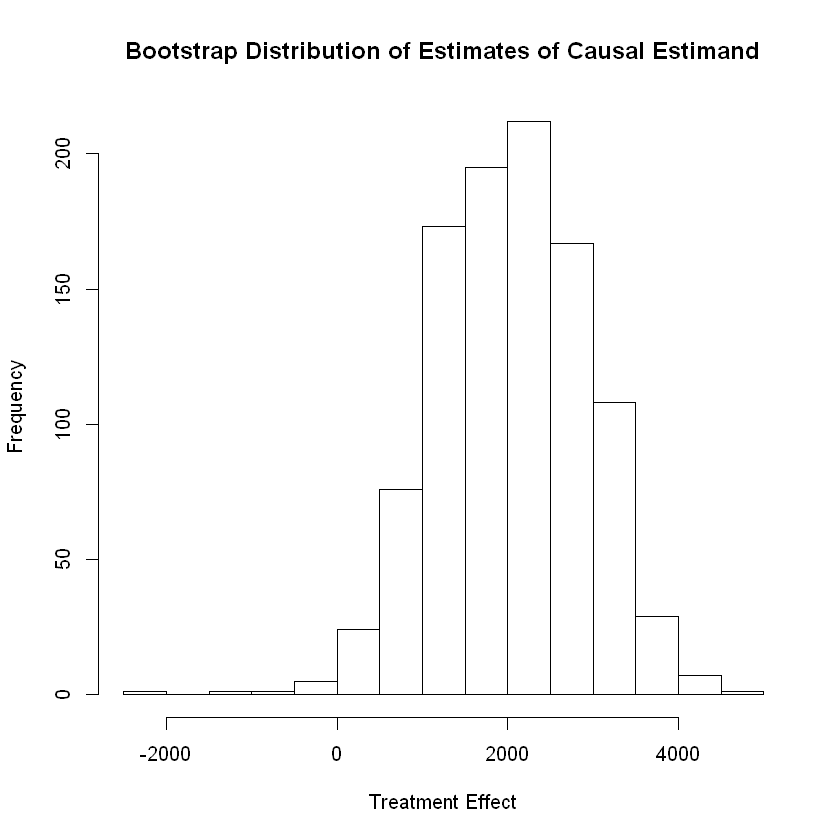

In [17]:
options(warn=-1)

number_of_bootstrap_draws = 10^3

observational_data = subclass_1
treatment_effect_estimates_1 = rep(NA, number_of_bootstrap_draws)
observational_data_treated = observational_data[observational_data$TREAT==1,]
observational_data_control = observational_data[observational_data$TREAT==0,]

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  observational_data_new_treated = observational_data_treated[sample((1:nrow(observational_data_treated)), replace=TRUE),]
  observational_randomForest_new_treated = randomForest(x=observational_data_new_treated[,3:12], 
                                                        y=observational_data_new_treated[,1])
  observational_data_new_control = observational_data_control[sample((1:nrow(observational_data_control)), replace=TRUE),]
  observational_randomForest_new_control = randomForest(x=observational_data_new_control[,3:12], 
                                                        y=observational_data_new_control[,1])  
  
  treatment_effect_estimates_1[i] = mean(c((observational_data_new_treated[,1] - 
                                            predict(observational_randomForest_new_control,
                                                    observational_data_new_treated[,3:12])),
                                           (predict(observational_randomForest_new_treated, 
                                                    observational_data_new_control[,3:12]) - 
                                            observational_data_new_control[,1])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)


observational_data = subclass_2
treatment_effect_estimates_2 = rep(NA, number_of_bootstrap_draws)
observational_data_treated = observational_data[observational_data$TREAT==1,]
observational_data_control = observational_data[observational_data$TREAT==0,]

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  observational_data_new_treated = observational_data_treated[sample((1:nrow(observational_data_treated)), replace=TRUE),]
  observational_randomForest_new_treated = randomForest(x=observational_data_new_treated[,3:12], 
                                                        y=observational_data_new_treated[,1])
  observational_data_new_control = observational_data_control[sample((1:nrow(observational_data_control)), replace=TRUE),]
  observational_randomForest_new_control = randomForest(x=observational_data_new_control[,3:12], 
                                                        y=observational_data_new_control[,1])  
  
  treatment_effect_estimates_2[i] = mean(c((observational_data_new_treated[,1] - 
                                            predict(observational_randomForest_new_control,
                                                    observational_data_new_treated[,3:12])),
                                           (predict(observational_randomForest_new_treated, 
                                                    observational_data_new_control[,3:12]) - 
                                            observational_data_new_control[,1])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)


observational_data = subclass_3
treatment_effect_estimates_3 = rep(NA, number_of_bootstrap_draws)
observational_data_treated = observational_data[observational_data$TREAT==1,]
observational_data_control = observational_data[observational_data$TREAT==0,]

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  observational_data_new_treated = observational_data_treated[sample((1:nrow(observational_data_treated)), replace=TRUE),]
  observational_randomForest_new_treated = randomForest(x=observational_data_new_treated[,3:12], 
                                                        y=observational_data_new_treated[,1])
  observational_data_new_control = observational_data_control[sample((1:nrow(observational_data_control)), replace=TRUE),]
  observational_randomForest_new_control = randomForest(x=observational_data_new_control[,3:12], 
                                                        y=observational_data_new_control[,1])  
  
  treatment_effect_estimates_3[i] = mean(c((observational_data_new_treated[,1] - 
                                            predict(observational_randomForest_new_control,
                                                    observational_data_new_treated[,3:12])),
                                           (predict(observational_randomForest_new_treated, 
                                                    observational_data_new_control[,3:12]) - 
                                            observational_data_new_control[,1])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)


observational_data = subclass_4
treatment_effect_estimates_4 = rep(NA, number_of_bootstrap_draws)
observational_data_treated = observational_data[observational_data$TREAT==1,]
observational_data_control = observational_data[observational_data$TREAT==0,]

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  observational_data_new_treated = observational_data_treated[sample((1:nrow(observational_data_treated)), replace=TRUE),]
  observational_randomForest_new_treated = randomForest(x=observational_data_new_treated[,3:12], 
                                                        y=observational_data_new_treated[,1])
  observational_data_new_control = observational_data_control[sample((1:nrow(observational_data_control)), replace=TRUE),]
  observational_randomForest_new_control = randomForest(x=observational_data_new_control[,3:12], 
                                                        y=observational_data_new_control[,1])  
  
  treatment_effect_estimates_4[i] = mean(c((observational_data_new_treated[,1] - 
                                            predict(observational_randomForest_new_control,
                                                    observational_data_new_treated[,3:12])),
                                           (predict(observational_randomForest_new_treated, 
                                                    observational_data_new_control[,3:12]) - 
                                            observational_data_new_control[,1])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)


observational_data = subclass_5
treatment_effect_estimates_5 = rep(NA, number_of_bootstrap_draws)
observational_data_treated = observational_data[observational_data$TREAT==1,]
observational_data_control = observational_data[observational_data$TREAT==0,]

progress_bar = txtProgressBar(min=1, max=number_of_bootstrap_draws, style = 3)
for(i in 1:number_of_bootstrap_draws)
{
  observational_data_new_treated = observational_data_treated[sample((1:nrow(observational_data_treated)), replace=TRUE),]
  observational_randomForest_new_treated = randomForest(x=observational_data_new_treated[,3:12], 
                                                        y=observational_data_new_treated[,1])
  observational_data_new_control = observational_data_control[sample((1:nrow(observational_data_control)), replace=TRUE),]
  observational_randomForest_new_control = randomForest(x=observational_data_new_control[,3:12], 
                                                        y=observational_data_new_control[,1])  
  
  treatment_effect_estimates_5[i] = mean(c((observational_data_new_treated[,1] - 
                                            predict(observational_randomForest_new_control,
                                                    observational_data_new_treated[,3:12])),
                                           (predict(observational_randomForest_new_treated, 
                                                    observational_data_new_control[,3:12]) - 
                                            observational_data_new_control[,1])))
  
  setTxtProgressBar(progress_bar, i)
}
close(progress_bar)


overall_treatment_effect_estimates = weights%*%rbind(t(treatment_effect_estimates_1),
                                                     t(treatment_effect_estimates_2),
                                                     t(treatment_effect_estimates_3),
                                                     t(treatment_effect_estimates_4),
                                                     t(treatment_effect_estimates_5))

hist(overall_treatment_effect_estimates, main="Bootstrap Distribution of Estimates of Causal Estimand", xlab="Treatment Effect")
quantile(overall_treatment_effect_estimates, prob=c(0.025,0.25,0.5,0.75,0.975))

### Analyzing Designed Observational Studies

There are four broad classes of strategies for causal inferences from designed observational studies (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 270 - 276).

1. Model-based imputation.


2. Inverse-propensity score weighted estimators.
    - This strategy is similar to Horvitz-Thompson estimation in survey sampling.
    - Dividing by extreme probabilities can lead to sensitive estimators.


3. Blocking estimators that use the propensity score.
    - Can incorporate covariate adjustment within blocks.
    
    
4. Matching estimators.


Combinations of these strategies can also be implemented in practice.

Subclassification with covariate adjustment within subclasses, and matching with covariate adjustment, are particularly attractive methods.

## Supplementary Material

### Addressing Controversies Over Causal Inference Based on Linear Regression

<i> "Experiments should be analyzed as experiments, not observational studies" </i> (Freedman, <a href="https://doi.org/10.1177%2F0193841X06293771">2006</a>: p. 691).

Implication: Analyze experiments as you designed them, in particular, by means of randomization-based inferences. Don't analyze experiments by regression models (and, by extension, machine learning algorithms) typically used in the analyses of observational studies.

Counterargument: 

- Experiments have unconfounded assignment mechanisms.

- $\Rightarrow$ Potential outcomes in experiments are missing at random. 

- $\Rightarrow$ Imputation methods based on models can be used to impute missing potential outcomes and perform inferences on finite-population causal estimands (assuming the models are appropriate).

<br>

<i> "... randomization does not justify the assumptions behind the ols [ordinary least squares] model" </i> (Freedman, <a href="https://doi.org/10.1016/j.aam.2006.12.003">2008</a>: p. 181).

Counterargument:

- Randomization corresponds to an unconfounded assignment mechanism, which justifies standard types of imputation methods.

- If a model does not capture the relationships between the potential outcomes, treatments, and covariates, specify a better model.

  - Machine learning algorithms could yield valid imputation methods, and be more flexible than standard linear regression models.

### Propensity Score and Their Theoretical Properties

Recall the three assumptions for a regular assignment mechanism.

#### Individualistic Assignment

There exists a function $q: \mathbb{R}^{K+2} \rightarrow (0,1)$ such that for all subjects $i$, 
$$
p_i(\mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1)) = q(X_i, Y_i(0), Y_i(1))
$$
and 
$$\mathrm{Pr} \{ \mathbf{W} \mid \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1) \} = c \displaystyle \prod_{i=1}^N q(X_i, Y_i(0), Y_i(1))^{W_i}\{1-q(X_i,Y_i(0),Y_i(1))\}^{1-W_i}
$$ 
for some set of $(\mathbf{W}, \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1))$, where $c$ is the normalization constant for the probability mass function of the treatment assignment mechanism.

#### Probabilistic Assignment

For all subjects $i$, $0 < p_i(\mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1)) < 1$. 

#### Unconfounded Assignment

For any $\mathbf{w} \in \{0, 1\}^N$ and potential outcome vectors $\mathbf{Y}(0), \mathbf{Y}'(0), \mathbf{Y}(1), \mathbf{Y}'(1) \in \mathbb{R}^N$,
$$
\mathrm{Pr} \{ \mathbf{W} = \mathbf{w} \mid  \mathbf{X}, \mathbf{Y}(0), \mathbf{Y}(1) \} = \mathrm{Pr} \{ \mathbf{W} = \mathbf{w} \mid  \mathbf{X}, \mathbf{Y}'(0), \mathbf{Y}'(1) \}. 
$$


&#9757; Besides sequential experiments (such as multi-armed bandits), the individualistic assignment mechanism is not particularly controversial.

&#9757; If an experimental unit receives treatment with either probability zero or probability one, then estimates of the treatment effect for similar such experimental units will necessarily involve extrapolation, and so such units should not be considered for causal inferences. The probabilistic assignment mechanism is thus intuitive and justifiable.

&#9757; The unconfoundedness assumption is perhaps the most controversial assumption for causal inference on observational studies under the Rubin Causal Model. Having said that, it is commonly invoked across a wide range of domains (Imbens & Rubin, 2015: p. 262 - 263).


These regularity assumptions do not merely enable causal inferences for randomized experiments. They can also enable valid causal inferences for observational studies.

&#128161; If an (unknown) assignment mechanism is regular, then for that assignment mechanism we have that 

- a completely randomized design was effectively conducted for subpopulations of experimental units with the same covariates, and that

- a causal interpretation can be attached to the comparison of observed outcomes for treated and control units within the subpopulations.

The second implication holds because the observed outcomes within a particular subpopulation constitute a random sample of the potential outcomes for that subpopulation, so that the difference in observed averages is unbiased for the subpopulation average treatment effect.

&#128161; The fact that the assignment mechanism is unknown does not matter for this result.

These desirable implications of a regular assignment mechanism can be *operationalized* for deriving valid, unbiased causal inferences from observational studies that have regular assignment mechanisms by means of the propensity scores
$$
e(X_i) = \mathrm{Pr}(W_i = 1 \mid X_i).
$$

### Formal Derivations of the Properties of Propensity Scores

#### Treatment Assignment Does Not Depend on Covariates Given Propensity Scores

<b> Claim </b>: For a regular assignment mechanism, $\mathrm{Pr} \left \{ W_i = 1 \mid X_i, e(X_i) \right \} = \mathrm{Pr} \left \{ W_i = 1 \mid e(X_i) \right \}$.

<b> Proof </b>: As $e(X_i)$ is a function of $X_i$, $\mathrm{Pr} \left \{ W_i = 1 \mid X_i, e(X_i) \right \} = \mathrm{Pr} \left \{ W_i = 1 \mid X_i \right \} = e(X_i)$. Also, by ADAM's Law,

\begin{align}
\mathrm{Pr} \left \{ W_i = 1 \mid e(X_i) \right \} &= \mathbb{E} \left \{ W_i \mid e(X_i) \right \} \\
&= \mathbb{E} \left \{ \mathbb{E} \left \{ W_i \mid X_i, e(X_i) \right \} \mid e(X_i) \right \} \\
&= \mathbb{E} \left \{ e(X_i) \mid e(X_i) \right \} \\
&= e(X_i).
\end{align}

We thus immediately have the result. &#8718;

&#128161; An estimated propensity score serves as a one-dimensional summary of all covariates, such that experimental units with the same propensity score values have similar covariates.

&#128161; If many covariates are considered for the design and analysis of an observational study (e.g., so as to ensure unconfoundedness), it can be sufficient to design the study based on the propensity score so as to yield balance on the covariates involved in the propensity score.

#### Unconfoundedness Given the Propensity Score

<b> Claim </b>: For an unconfounded treatment assignment mechanism, the treatment assignment is unconfounded given the propensity scores, i.e.,
$$
\mathrm{Pr} \left \{ W_i \mid Y_i(0), Y_i(1), e(X_i) \right \} = \mathrm{Pr} \left \{ W_i \mid e(X_i) \right \} = e(X_i).
$$

<b> Proof </b>:

\begin{align}
\mathrm{Pr} \left \{ W_i = 1 \mid Y_i(0), Y_i(1), e(X_i) \right \} &= \mathbb{E} \left \{ W_i \mid Y_i(0), Y_i(1), e(X_i) \right \} \\
&= \mathbb{E} \left \{ \mathbb{E} \left \{ W_i \mid Y_i(0), Y_i(1), X_i, e(X_i) \right \} \mid Y_i(0), Y_i(1), e(X_i) \right \} \\
&= \mathbb{E} \left \{ \mathbb{E} \left \{ W_i \mid X_i, e(X_i) \right \} \mid Y_i(0), Y_i(1), e(X_i) \right \} \\
&= e(X_i) 
\end{align}

&#128161; Given a vector of covariates that ensure unconfoundedness, adjustment for treatment-control differences in propensity scores suffices for removing biases associated with the differences in covariates.

- Conditional on propensity score, treatment assignment is independent of the covariates. Even if a covariate is associated with the potential outcomes, differences in covariates between treated and control units do not lead to bias because they cancel out by averaging over all units with the same value for the propensity score.

&#9757; This situation is analogous to that of a completely randomized design.


#### The Propensity Score is the Coarsest Balancing Score

<b> Claim </b>: If $b(X_i)$ is a function of the covariates such that $\mathrm{Pr} \left \{ W_i = 1 \mid X_i, b(X_i) \right \} = \mathrm{Pr} \left \{ W_i = 1 \mid b(X_i) \right \}$ (i.e., $b(X_i)$ is a *balancing score*), then $e(X_i) = g(b(X_i))$ for some function $g$.

&#128161; The propensity score provides the biggest benefit in terms of reducing the number of variables we need to adjust for.

### The Importance and Controversy of Unconfoundedness

The unconfoundeness assumption is critical to the utility of regular assignment mechanisms.

For an assignment mechanism to be unconfounded, we must have a sufficiently rich set of covariates such that adjusting for differences in their observed values between the treatment and control groups will remove systematic biases in the causal inferences.

The unconfoundness assumption is typically the most controversial assumption for causal inferences on observational studies under the Rubin Causal Model.

Furthermore, this assumption is not testable: the data are not directly informative about the distribution of $Y_i(0)$ for those units $i$ given treatment, nor are they directly informative about the distribution of $Y_j(1)$ for those units $j$ given control.

Our inability to test unconfoundedness in general is similar to our inability to test whether a missing data mechanism is missing not at random (MNAR) or missing at random (MAR). 

As unconfoundedness is such an important and controversial assumption, supplementary analyses that can assess its plausibility can be important for drawing causal conclusions.

### The Superpopulation Perspective in Observational Studies

The superpopulation perspective can be helpful for evaluating the frequentist properties of causal inference methods for observational studies with regular assignment mechanisms.

&#9757; In the previous derivations, covariates $X_i$ were considered to have been randomly drawn from a distribution.

The superpopulation perspective on unconfoundedness is also helpful for clarifying how the distributions of missing and observed potential outcomes are related. 

&#128161; We have under unconfoundedness that for all $i = 1, \ldots, N$,
$$
\left ( Y_i^{\mathrm{mis}} \mid W_i = w, X_i \right ) \sim \left ( Y_i^{\mathrm{obs}} \mid W_i = 1 - w, X_i \right),
$$
so that as $Y_i^{\mathrm{mis}} = (1-W_i)Y_i(1) + W_iY_i(0)$, $Y_i^{\mathrm{obs}} = W_iY_i(1) + (1-W_i)Y_i(0)$, the distribution of a missing potential outcome equals the distribution of an observable outcome. 

This is important because the data are not directly informative about the distribution of $Y_i^{\mathrm{mis}}$ unless we have an assumption such as unconfoundedness that connects this distribution to distributions that can be inferred from the data.

&#9757; Unconfoundedness is not a testable assumption. However, it does imply that one should compare "like with like", and thus it is well-motivated.
- If we did not have unconfoundedness, then we would have to stratify or match individuals with systematic differences in covariates (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 264).


Although unconfoundedness is not testable, there do exist analyses that can be done to assess its validity.

- Estimate the treatment effect on an outcome known <i>a priori</i> not to be affected by treatment.


- Estimate the effect of a pseudo-treatment on the outcome.


- Assess the sensitivty of the estimates to the choice of covariates.

### The Central Role of the Propensity Score

If unconfoundedness is valid for an observational study, then biases in the causal inferences can be removed by adjusting for differences in covariates.

Such adjustments can be difficult to perform if there are a large number of covariates.

The propensity score is effectively a low-dimensional summary of covariates that is sufficient for removing biases in causal inferences from observational studies in which treatment and control groups differ in terms of covariates.

&#9757; In practice, it may not be necessary to get precise inferences on propensity scores. Instead, we use propensity score models as devices for designing observational studies with good covariate balance.


# Do not look at observed outcomes during the design of an observational study (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 276).

1. Assess balance in covariate distributions between treated and control units.
    - Standardized difference in average covariate values by treatment group.
       - When treatment groups have important covariates that are more than $1/4$ or $1/2$ of a standard deviation apart, simple regression methods are unreliable for removing biases (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 277).
    - Distributions of the propensity scores.
    
    
2. Trimming using the propensity score.
    - There are two different trimming approaches that are relevant for the two different estimands of the average treatment effect (ATE) and average treatment effect for the treated (ATT). 
        - For the ATE estimand, remove control units whose propensity scores are less than the minimum of the treated units' propensity scores, and remove treated units who propensity scores are greater than the maximum of the control units' propensity scores. <br> &#129300; What could be an issue with this approach?
        - For the ATT estimand, follow the previous procedure.
        - For more information, read the following <a href="https://economics.mit.edu/files/32">article</a>.


3. Subclassification or matching.
    - If you have a large pool of control units, consider matching. Otherwise, consider subclassification.
    
Covariate imbalances in observational studies can make causal inferences sensitive to changes in analysis methods (e.g., standard Neymanian inferences versus model-based inferences) and their specifications (e.g., covariates included in potential outcomes models).

In addition, covariate imbalances can make causal inferences imprecise.

Performing a design phase for an observational study can lead to robust and valid causal inferences for the sample of subjects included in the study.

For an observational study with a regular assignment mechanism, the estimated propensity scores can be useful for designing the observational study and obtaining valid, unbiased causal inferences.

<b> The goal in estimating the propensity score is to design the observational study based on the estimates so as to obtain balanced covariate distributions between the treatment and control groups. </b>

- We estimate the propensity score so as to group together experimental units with similar estimated propensity scores and obtain subgroups of treated and control units with similar covariate distributions.

<b> The goal in estimating the propensity score is *not* to obtain the best estimate of the true propensity scores. </b>

- Sometimes estimated propensity scores are better than true propensity scores in terms of yielding designed observational studies with good covariate balance.

- Typically, we are not interested in interpreting the propensity scores, although assessing the strength and nature of the dependence of treatment assignment on the covariates could be helpful for assessing the unconfoundedness assumption.

### General Procedure for Estimating Propensity Scores and Designing Observational Studies

1. Specify an initial propensity score model that contains covariates thought *a priori* to be correlated with treatment assignment and/or the potential outcomes.


2. Assess the covariate balance for the designed observational study based on the previously specified and fitted propensity score model.


3. Return to Step 1 if the covariate balance in the designed observational study obtained via the previous propensity scores as unsatisfactory.


- These steps can be performed as often necessary.


- <b> In all these steps, we do not look at the outcomes. </b> This helps to prevent deliberately biasing the final causal inferences. 


- It is difficult to automate this procedure, for the same reason that it is difficult to automate experimental design. 
    - Imbens & Rubin (2015, p. 285 - 288) give one such procedure, but it should be viewed as an "initialization" of the general procedure above.


- Subject-matter knowledge and domain experts are essential to the success of this procedure.


- Don't blindly trust automated procedures. <b> Explicitly check the balance of the covariates after designing the observational study. </b>

### Constructing Strata Based on Estimated Propensity Scores

The adequacy of a propensity score model specification can be assessed by means of the property that, for a regular assignment mechanism, $\mathrm{Pr} \left \{ W_i = 1 \mid X_i, e(X_i) \right \} = \mathrm{Pr} \left \{ W_i = 1 \mid e(X_i) \right \}$.

Specifically, using the estimates $\hat{e}(X_i)$ of the propensity scores, check whether the covariates are independent of the treatment group.

- This precisely corresponds to good covariate balance.

This assessment is done after constructing subclasses/strata/blocks of experimental units such that the units within a specific subclass have similar propensity scores (i.e., the propensity score estimates within a subclass have small variability).

- If subclasses have small variability in the propensity score estimates, but poor covariate balance, then the propensity score model is most likely poorly specified.

- Trimming the experimental units based on the propensity score estimates can be helpful, but be aware of how trimming could be connected to the choice of estimand (e.g., trimming procedures can differ depending on whether the ATE or ATT causal estimand is of interest (Imbens & Rubin, 2015: p. 313)).

Imbens & Rubin (<a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>, p. 293 - 294) provide an automated procedure for propensity score subclassification based on propensity score estimates.

- Automated procedures can be very useful for research on design methodologies for observational studies, as they facilitate the implementation of simulation studies. However, they may serve as only first steps for constructing an appropriate design in real-life observational studies.

### Assessing Covariate Balance Based on Propensity Score Estimates

We are interested in comparing two multivariate covariate distributions: one for the treatment group, and the other for the control group.

In practice, we compare the centers and spreads/dispersions of the two distributions.


1. For each covariate, calculate the estimate of the *normalized difference* to measure the difference between the locations of the two distributions (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 310).
$$
\Delta_{ct} = \frac{\mu_t - \mu_c}{\sqrt{(\sigma_t^2 + \sigma_c^2)/2}} 
$$

$$
\hat{\Delta}_{ct} = \frac{\bar{X}_t - \bar{X}_c}{\sqrt{(s_t^2 + s_c^2)/2}} 
$$

2. For each covariate, calculate the fraction of the treated (control) units that have covariate values in the tails of the covariate distribution for the control (treated) units.


- This can help indicate the difficulty in predicting missing potential outcomes for the treated and the control units.


3. Calculate the Mahalanobis metric distance for the vector of covariate averages (Imbens & Rubin, <a href="https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB">2015</a>: p. 314).
$$
\Delta_{cv}^{\mathrm{mv}} = \sqrt{ \left ( \mu_t - \mu_c \right )^{\mathsf{T}} \left ( \frac{\Sigma_c + \Sigma_t}{2} \right )^{-1} \left ( \mu_t - \mu_c \right )}
$$

$$
\hat{\Delta}_{cv}^{\mathrm{mv}} = \sqrt{ \left ( \bar{X}_t - \bar{X}_c \right )^{\mathsf{T}} \left ( \frac{\hat{\Sigma}_c + \hat{\Sigma}_t}{2} \right )^{-1} \left ( \bar{X}_t - \bar{X}_c \right )}
$$


4. For each covariate, test whether the mean of the covariate distribution for the treatment group equals the mean of the covariate distribution for the control group, aggregated across the subclasses.


- This can be done via a $t$-test, where the numerator consists of a weighted average of covariate averages across the subclasses, and the denominator consists of a weighted average of sample variances across the subclasses (Imbens & Rubin, 2015: p. 298).

- The $t$-test in this context is actually meant to assess whether the differences between the two distributions are so great that biases will remain in causal inferences.

- The $t$-test will inevitably reject the null hypothesis in large samples, even if the normalized difference stays the same. As such, it can be less relevant than the normalized difference (Imbens & Rubin, 2015: p. 311).

- Similar tests can be performed for comparing the dispersions in the two covariate distributions (Imbens & Rubin, 2015: p. 312)

- We can consider transformations of the covariates as well. The propensity score can be seen as one such transformation.


5. For each covariate, test whether the mean of the covariate distribution for the treatment group equals the mean of the covariate distribution for the control group within each strata.


- This can be done via linear regression/ANOVA by considering interactions between treatment and the subclasses (Imbens & Rubin, 2015: p. 298 - 299).


6. For each covariate and stratum, test whether the mean of the covariate distribution for the treatment group equals the mean of the covariate distribution for the control group.


- This can be done via a t-test.


Visualizations can be extremely useful for assessing covariate balance.

- Love plot.

- Overlapping histograms for a single covariate across the treatment and control groups.

- Overlapping empirical CDFs for a single covariate across the treatment and control groups.

- QQ plots of t-test statistics. If the covariate are well-balanced, then the QQ plots should be flatter than a 45-degree line.

- Histograms of t-test statistics. If the covariates are well-balanced, then the histogram should be approximately t-distributed.


If the covariate distributions for the treatment and control groups are similar, then one should be concerned less about the sensitivity of estimates, and one can have some assurance that they removed bias from the analyses of the observational study.

Imbens and Rubin (2015, p. 318 - 332) provide four case studies that demonstrate how covariate balance can be assessed in practice.

The manual identification of subclasses and matches can take some time and effort, but is ultimately useful for better understanding the experimental units in the observational study, and fruitful for understanding the mechanics of subclassification and matching.

### Matching for the Design of an Observational Study

Consider the setting in which 

- there is a large pool of possible controls for the design of an observational study,

- the set of treated units is fixed <i>a priori</i>, and

- the estimand of interest is the average treatment effect for the treated (ATT).

In such a setting, matching methods can be implemented to effectively select a control sample that is well-balanced with respect to the treated experimental units.

In a matching procedure, one or more distinct controls are matched to each treated unit so that their covariates are all very similar to one another.

Matching experimental units can make the subsequent analyses more robust and credible.

### Example: Propensity Score Matching for the Job Training Program Study via the "Matching" Package

In [18]:
#install.packages("Matching")

library(Matching)

observational_data = read.table("Lalonde_observational_data.txt", header=T, sep="")

propensity_score_model = glm(TREAT~EDUC + AGE + RE74 + RE75 + U74 + U75 + BLACK + MARR + HISPANIC +
                                   EDUC:AGE + RE75:MARR + AGE:BLACK + EDUC:U74 + U74:U75 + AGE:MARR + 
                                   AGE:RE75 + EDUC:RE75 + BLACK:MARR + AGE:U74 + AGE:U75,
                            data=observational_data,
                            family = "binomial")

propensity_score_estimates = propensity_score_model$fitted
observed_outcomes = observational_data$RE78
treatment = observational_data$TREAT

matched_dataset = Match(Y=observed_outcomes, X=propensity_score_estimates, Tr=treatment, M=1)
summary(matched_dataset)

matched_dataset_matrix = rbind(observational_data[matched_dataset$index.treated,], 
                               observational_data[matched_dataset$index.control,])

head(matched_dataset_matrix)
tail(matched_dataset_matrix)

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:sm':

    muscle


## 
##  Matching (Version 4.9-7, Build Date: 2020-02-05)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##





Estimate...  1558.2 
AI SE......  1751 
T-stat.....  0.88987 
p.val......  0.37354 

Original number of observations..............  2675 
Original number of treated obs...............  185 
Matched number of observations...............  185 
Matched number of observations  (unweighted).  548 



,RE78,TREAT,MARR,NODEGREE,BLACK,HISPANIC,EDUC,AGE,RE74,RE75,U74,U75,TYPE
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>
1,9930.0,1,1,1,1,0,11,37,0,0,1,1,EXP
2,3595.9,1,0,1,0,1,9,22,0,0,1,1,EXP
3,24909.5,1,0,0,1,0,12,30,0,0,1,1,EXP
3.1,24909.5,1,0,0,1,0,12,30,0,0,1,1,EXP
4,7506.1,1,0,1,1,0,11,27,0,0,1,1,EXP
5,289.8,1,0,1,1,0,8,33,0,0,1,1,EXP


,RE78,TREAT,MARR,NODEGREE,BLACK,HISPANIC,EDUC,AGE,RE74,RE75,U74,U75,TYPE
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>
2473,17732.72,0,1,1,1,0,7,50,20384.21,17008.06,0,0,OBS
2489,17732.72,0,1,1,1,0,6,48,21551.94,16112.90,0,0,OBS
2495,31032.26,0,1,1,1,0,10,22,21551.94,25064.52,0,0,OBS
2547,29554.53,0,1,1,1,0,11,44,24294.91,35806.45,0,0,OBS
2548,29554.53,0,1,1,1,0,11,44,24294.91,35806.45,0,0,OBS
2607,45809.52,0,0,1,1,0,11,36,29389.00,25982.95,0,0,OBS


In [19]:
matched_dataset_balance = MatchBalance(TREAT~EDUC + AGE + RE74 + RE75 + U74 + U75 + BLACK + MARR + HISPANIC +
                                             EDUC:AGE + RE75:MARR + AGE:BLACK + EDUC:U74 + U74:U75 + AGE:MARR + 
                                             AGE:RE75 + EDUC:RE75 + BLACK:MARR + AGE:U74 + AGE:U75,
                                      data=observational_data,
                                      match.out=matched_dataset,
                                      nboots=10)


***** (V1) EDUC *****
                       Before Matching 	 	 After Matching
mean treatment........     10.346 	 	     10.346 
mean control..........     12.117 	 	     10.474 
std mean diff.........    -88.077 	 	    -6.3509 

mean raw eQQ diff.....     1.8595 	 	    0.91058 
med  raw eQQ diff.....          2 	 	          1 
max  raw eQQ diff.....          5 	 	          3 

mean eCDF diff........     0.1091 	 	   0.056911 
med  eCDF diff........    0.01944 	 	   0.037409 
max  eCDF diff........    0.40289 	 	    0.32117 

var ratio (Tr/Co).....    0.42549 	 	    0.77938 
T-test p-value........ < 2.22e-16 	 	    0.50116 
KS Bootstrap p-value.. < 2.22e-16 	 	 < 2.22e-16 
KS Naive p-value...... < 2.22e-16 	 	 < 2.22e-16 
KS Statistic..........    0.40289 	 	    0.32117 


***** (V2) AGE *****
                       Before Matching 	 	 After Matching
mean treatment........     25.816 	 	     25.816 
mean control..........     34.851 	 	     24.934 
std mean diff.........    -126.27 	

### References

Cochran W.G. (1965). The planning of observational studies of human populations. *Journal of the Royal Statistical Society: Series A*, 128(2), 234-255.

Cochran W.G. (1968). The effectiveness of adjustment by subclassification in removing bias in observational studies. *Biometrics*, 24(2), 295-313.

Dehejia R.V. and Wahba S. (1999). Causal effects in nonexperimental studies: Reevaluating the evaluation of training programs. *Journal of the American Statistical Association* 94(448), 1053-1062.

Efron B. (1979). Bootstrap methods: Another look at the jackknife. *Annals of Statistics* 7(1), 1-26.

Freedman D.A. (2006). Statistical models for causation: What inferential leverage do they provide? *Evaluation Review* 30(6), 691-713.

Freedman D.A. (2008). On regression adjustments to experimental data. *Advances in Applied Mathematics* 40(2), 180-193.

Freedman D.A. (2009). *Statistical Models: Theory and Practice*, Cambridge University Press (2nd edition).

Garcia-Horton V. (2015). *Topics in Bayesian Inference for Causal Effects*. Harvard University Doctoral Dissertation.

Gelman A. and Pardoe I. (2007). Average predictive comparisons for models with nonlinearity, interactions, and variance components. *Sociological Methodology*, 37(1), 23-51.

Holland P.W. (1986). Statistics and causal inference. *Journal of the American Statistical Association* 81(396), 945-960.

Imbens G.W. and D.B. Rubin (2015). *Causal Inference for Statistics, Social, and Biomedical Sciences: An Introduction*, Cambridge University Press (1st edition).

K&uuml;nzel S.R., Sekhon J.S., Bickel P.J., Yu B. (2019). Metalearners for estimating heterogeneous treatment effects using machine learning. *Proceedings of the National Academy of Sciences of the United States of America* 116(10), 4156–4165.

LaLonde R.J. (1986). Evaluating the econometric evaluations of training programs with experimental data. *The American Economic Review* 76(4), 604-620.

Little R.J.A. and Rubin D.B. (2002). *Statistical Analysis With Missing Data*. Wiley-Interscience (2nd edition).  

Lu M., Sadiq S., Feaster D.J., Ishwaran H. (2018). Estimating individual treatment effect in observational data Using random forest methods. *Journal of Computational and Graphical Statistics* 27(1), 209-219.

Pearl, J. (2009) *Causality*, Cambridge University Press (2nd edition).

Rubin D.B. (1973). Matching to remove bias in observational studies. *Biometrics*, 29(1), 159-183.